# **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount)
against the customer’s gender and the various other factors to help the business make better decisions. They want to
understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than
men? (Assume 50 million customers are male and 50 million are female).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

**Loading Dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv

--2024-08-14 11:47:09--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.97, 3.162.130.189, 3.162.130.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M   101MB/s    in 0.2s    

2024-08-14 11:47:09 (101 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
wal = pd.read_csv('walmart_data.csv')
wal

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
wal.shape

(550068, 10)

In [ ]:
wal.size

5500680

In [ ]:
wal.ndim

2

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black
Friday.There are 10 features and 550068 records. The features are

User_ID: User ID

Product_ID: Product ID

Gender: Sex of User

Age: Age in bins

Occupation: Occupation(Masked)

City_Category: Category of the City (A,B,C)

StayInCurrentCityYears: Number of years stay in current city

Marital_Status: Marital Status

ProductCategory: Product Category(Masked)

Purchase: Purchase Amount


In [ ]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
for i in wal.columns:
 print(i,':',wal[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
for i in wal.columns:
 print(i,':',wal[i].value_counts())
 print('-'*70)

User_ID : User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
----------------------------------------------------------------------
Product_ID : Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
----------------------------------------------------------------------
Gender : Gender
M    414259
F    135809
Name: count, dtype: int64
----------------------------------------------------------------------
Age : Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
----------------------------------------------------------------------
Occupa

In [ ]:
for i in wal.columns:
 print('Unique Values in',i,'column are :-')
 print(wal[i].unique())
 print('-'*70)

Unique Values in User_ID column are :-
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['F' 'M']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
----------------------------------------------------------------------
Unique Values in Occupation column are :-
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
----------------------------------------------------------------------
Unique Values in City_Category column are :-
['A' 'C' 'B']
----------------------------------------------------------------------
Unique Values in Stay_In_Current_City_Years column are :

In [ ]:
wal[['Occupation','Product_Category','Purchase']].describe()

,Occupation,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000
mean,8.076707,5.404270,9263.968713
std,6.522660,3.936211,5023.065394
min,0.000000,1.000000,12.000000
25%,2.000000,1.000000,5823.000000
50%,7.000000,5.000000,8047.000000
75%,14.000000,8.000000,12054.000000
max,20.000000,20.000000,23961.000000


In [ ]:
wal.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


**Missing Value Analysis**

In [ ]:
wal.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


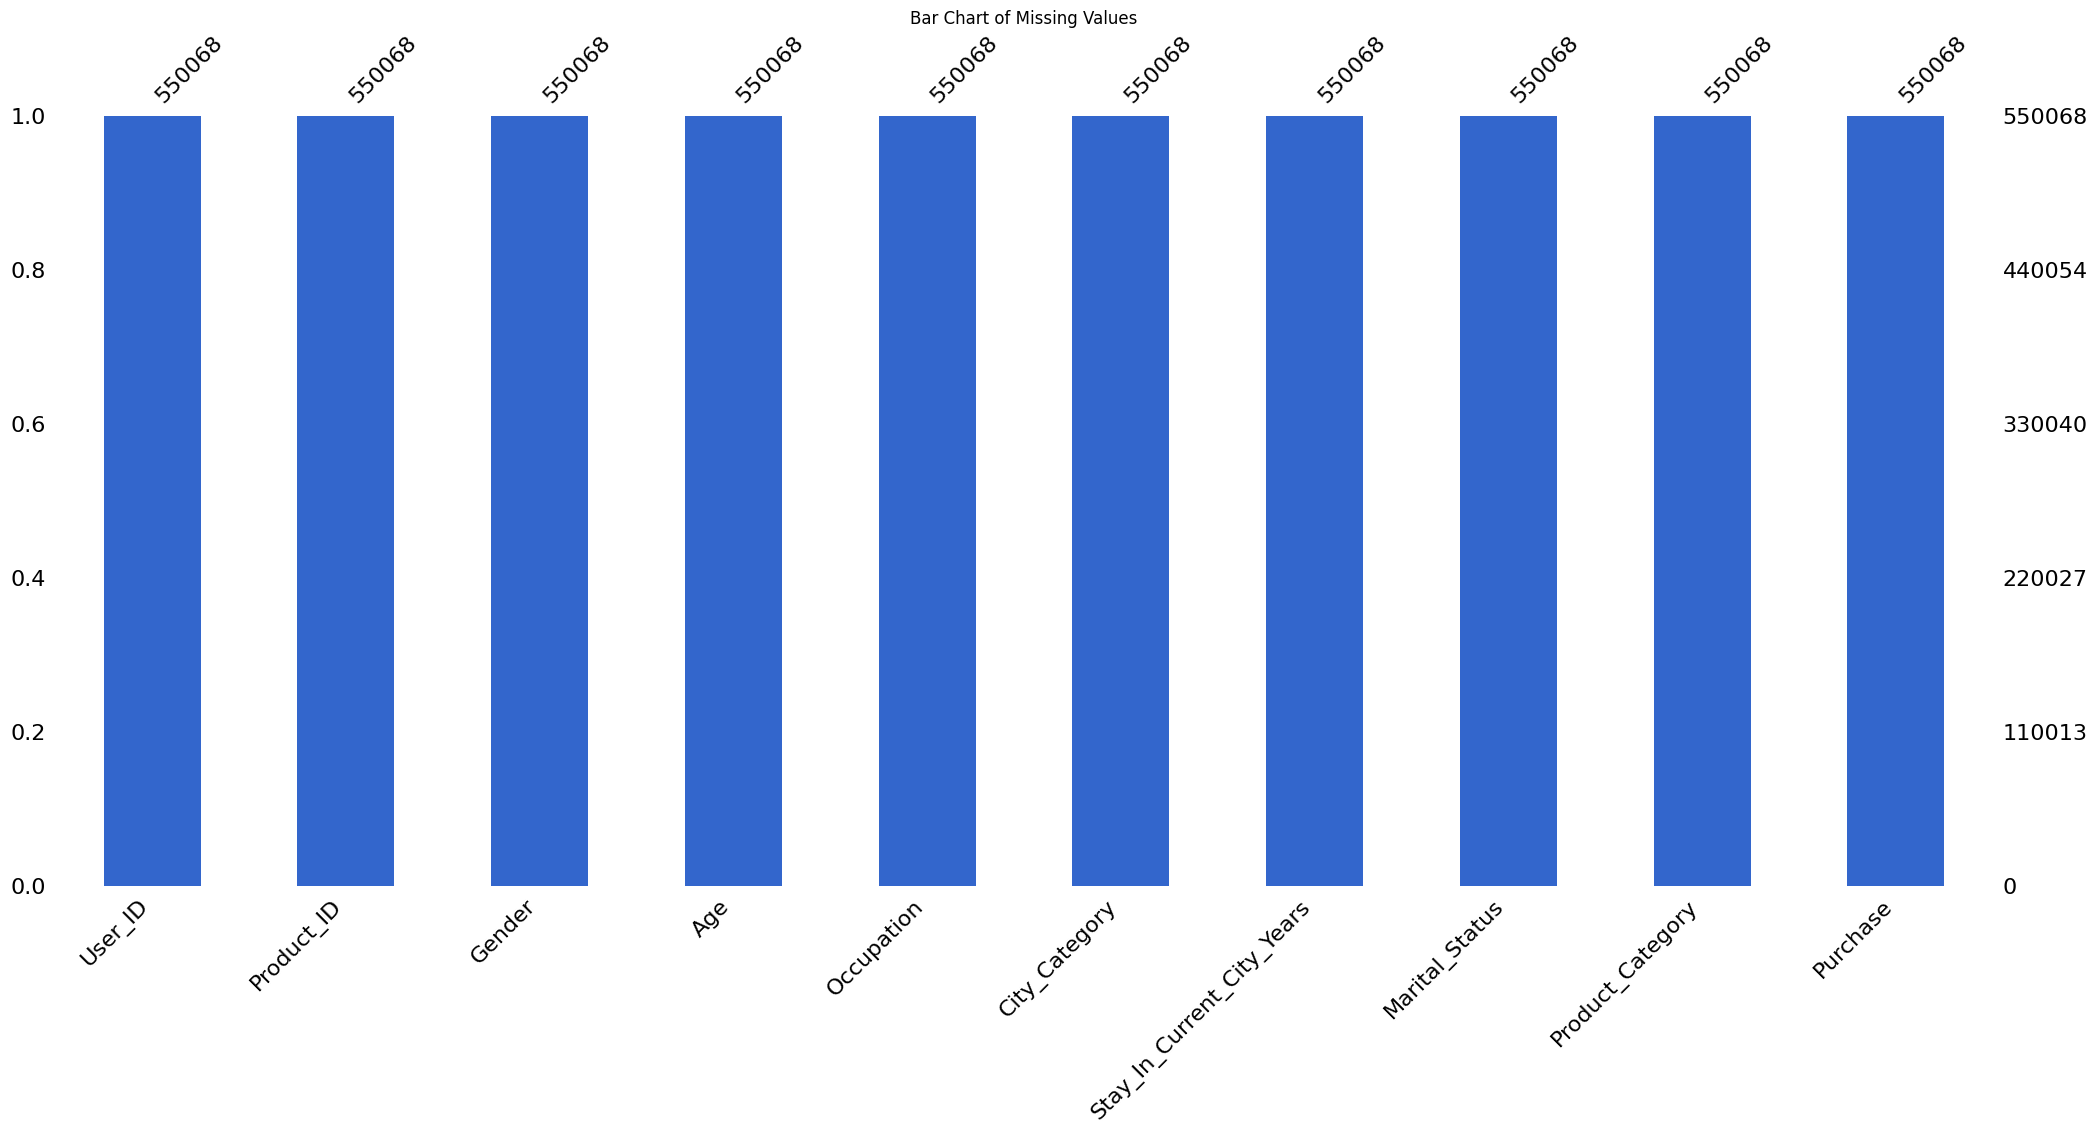

In [ ]:
import missingno as msno
msno.bar(wal,color=(0.2, 0.4, 0.8))
plt.title('Bar Chart of Missing Values')
plt.show()

There are no null values found.

**Duplicates Detection**

In [ ]:
wal.duplicated().sum()

0

There are no duplicates in the dataset.

**Univariate Analysis**

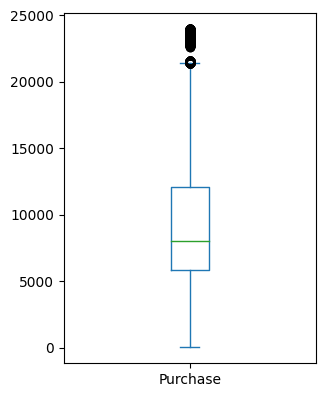

In [ ]:
#Finding out outliers and clipping the data from 5% to 95%
#Plotting box plot for all the columns
wal['Purchase'].plot(kind='box',subplots=True,layout=(2,4),figsize=(15,10))
plt.show()

**Insights**


Analysis of numerical columns before removing the outliers.

The median of Purchase Amount is nearly 8000 and it has some outliers at the range from 20000 to 25000.

There are some outliers from the range of 23000 to 25000




**Clipping the data from 5 percentile to 95 percentile**


In [ ]:
num_cols=['Purchase']
for i in range(len(num_cols)):
  data = wal[num_cols[i]].tolist()
  mini = np.min(data)
  Q1 = np.percentile(data, 25)
  Q2 = np.median(data)
  Q3 = np.percentile(data, 75)
  maxi = np.max(data)
  IQR = Q3 - Q1
  lo = Q1 - (1.5 * IQR)
  ho = Q3 + (1.5 * IQR)
  lower_outliers=[]
  upper_outliers=[]
  for k in data:
    if k < lo:
      lower_outliers.append(k)
    elif k > ho:
      upper_outliers.append(k)

uo_pct = round((len(upper_outliers)*100/wal.shape[0]),2)
lo_pct = round((len(lower_outliers)*100/wal.shape[0]),2)

print()
print(f"Outlier detection of {num_cols[i]}")
print('.'*30)
print("Minimum:", mini)
print("Maximum:", maxi)
print(f'Initial Range (with outlier) : {(maxi-mini)}')
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("IQR:", IQR)
print(f'Final Range (without outlier) : {(ho-lo)}')
print("Lower outliers are:", lower_outliers)
print("Upper outliers are:", upper_outliers)
print(f'Lower Outlier Percentage is {lo_pct}%')
print(f'Upper Outlier Percentage is {uo_pct}%')
print(f'Overall Outlier Percentage is {(lo_pct+uo_pct)}%')
if len(set(lower_outliers)):
  print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))} and they are {(set(lower_outliers))}')
else:
  print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))}')
if len(set(upper_outliers)):
  print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))} and they are {(set(upper_outliers))}')
else:
  print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))}')


Outlier detection of Purchase
..............................
Minimum: 3499
Maximum: 16437
Initial Range (with outlier) : 12938
Q1: 6121.0
Q2: 8047.0
Q3: 11556.0
IQR: 5435.0
Final Range (without outlier) : 21740.0
Lower outliers are: []
Upper outliers are: []
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 0.0%
Overall Outlier Percentage is 0.0%
Outlier points towards left of boxplot : 0
Outlier points towards right of boxplot : 0


Purchase: 5th Percentile = 3499.00, 95th Percentile = 16437.00


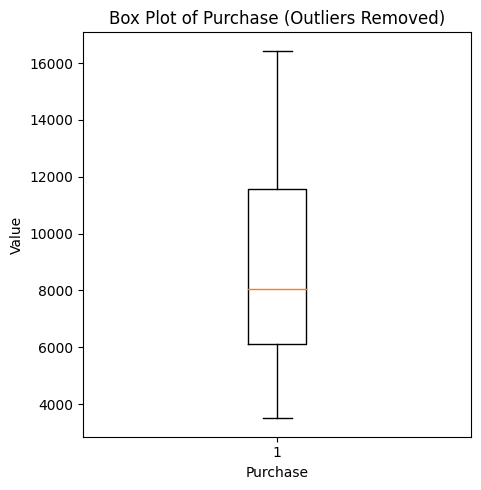

In [ ]:
for var in num_cols:
 # Calculate the 5th and 95th percentiles
 lower_bound = np.percentile(wal[var], 5)
 upper_bound = np.percentile(wal[var], 95)
 # Filter the data to remove outliers
 wal = wal[(wal[var] >= lower_bound) & (wal[var] <= upper_bound)]
 # Print the bounds for verification
 print(f'{var}: 5th Percentile = {lower_bound:.2f}, 95th Percentile = {upper_bound:.2f}')
# Plot boxplots again to show the effect of outlier removal
plt.figure(figsize=(17, 5))
for i, var in enumerate(num_cols):
 plt.subplot(1, 4, i + 1)
 plt.boxplot(wal[var])
 plt.title(f'Box Plot of {var} (Outliers Removed)')
 plt.xlabel(var)
 plt.ylabel('Value')
plt.tight_layout()
plt.show()

**Insights:**


Analysis after removing the outliers

The median is unchanged even after clipping the data from 5 to 95 for Purchase


In [ ]:
#After removing the outliers
wal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495114 entries, 0 to 545914
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     495114 non-null  int64 
 1   Product_ID                  495114 non-null  object
 2   Gender                      495114 non-null  object
 3   Age                         495114 non-null  object
 4   Occupation                  495114 non-null  int64 
 5   City_Category               495114 non-null  object
 6   Stay_In_Current_City_Years  495114 non-null  object
 7   Marital_Status              495114 non-null  int64 
 8   Product_Category            495114 non-null  int64 
 9   Purchase                    495114 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.6+ MB


54954 are the number of outliers present in the dataset

In [ ]:
#Converting Marital Status to Categorical for 0: Unmarried and 1: Married
wal['Marital_Status'] = wal['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})
wal['Marital_Status'].value_counts()

<ipython-input-22-dc91b68c6419>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wal['Marital_Status'] = wal['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})


,count
Marital_Status,
Unmarried,292509
Married,202605


The shape of the data has been changed after removing the outliers from the data

**PieCharts for categroical data**

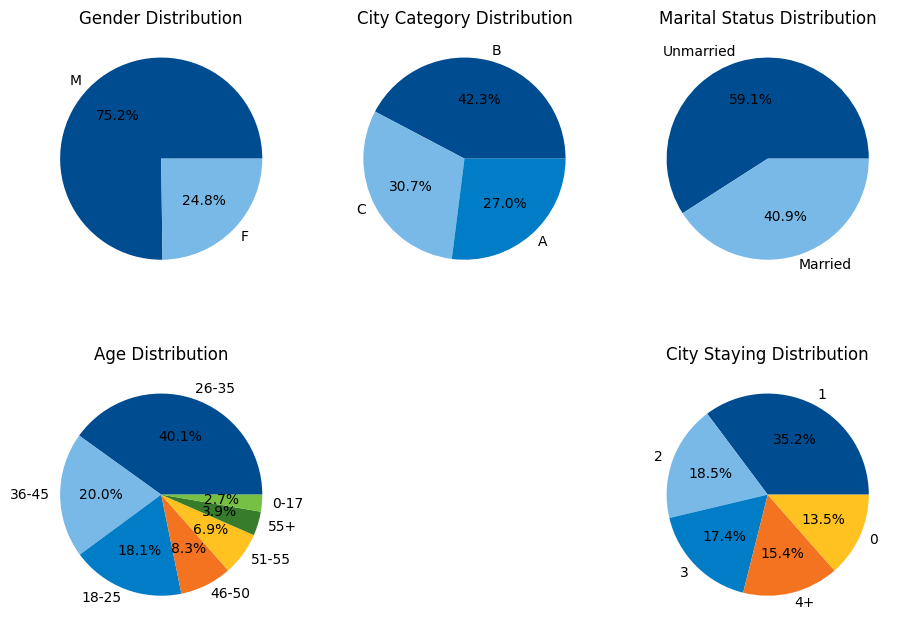

In [ ]:
#pie charts for gender,city_category,age,marital_status
plt.figure(figsize=(15,8))
plt.subplot(2,4,2)
gender_val=wal['Gender'].value_counts()
color_map=['#004c91','#78b9e7']
plt.pie(x=gender_val,labels=gender_val.index,autopct = '%.1f%%',colors=color_map)
plt.title('Gender Distribution')
plt.subplot(2,4,3)
city_val=wal['City_Category'].value_counts()
color_map=['#004c91','#78b9e7','#007dc6']
plt.pie(x=city_val,labels=city_val.index,autopct = '%.1f%%',colors=color_map)
plt.title('City Category Distribution')
plt.subplot(2,4,4)
marital_val=wal['Marital_Status'].value_counts()
color_map=['#004c91','#78b9e7']
plt.pie(x=marital_val,labels=marital_val.index,autopct = '%.1f%%',colors=color_map)
plt.title('Marital Status Distribution')
plt.subplot(2,4,6)
age_val=wal['Age'].value_counts()
color_map=['#004c91','#78b9e7','#007dc6','#f47321','#ffc220','#367c2b','#76c043']
plt.pie(x=age_val,labels=age_val.index,autopct = '%.1f%%',colors=color_map)
plt.title('Age Distribution')
plt.subplot(2,4,8)
city_stay_val=wal['Stay_In_Current_City_Years'].value_counts()
color_map=['#004c91','#78b9e7','#007dc6','#f47321','#ffc220']
plt.pie(x=city_stay_val,labels=city_stay_val.index,autopct = '%.1f%%',colors=color_map)
plt.title('City Staying Distribution')
plt.show()

**Insights:**


The Gender Distribution shows that the percentage of buying by Male is more when compared to Female.

The City Category Distribution shows that the percentage of buying by Category B is the most with 42.4%.

The Marital Status Distribution shows that the percentage of buying by Unmarried is more when compared to Married.

The Age Distribution shows that the percentage of buying by age 26-35 is 39.9% among all the age bins.

City Stay Distribution shows that the percentage of people who stayed for 1 year is 34.8% is more among all the bins.

<Figure size 640x480 with 0 Axes>

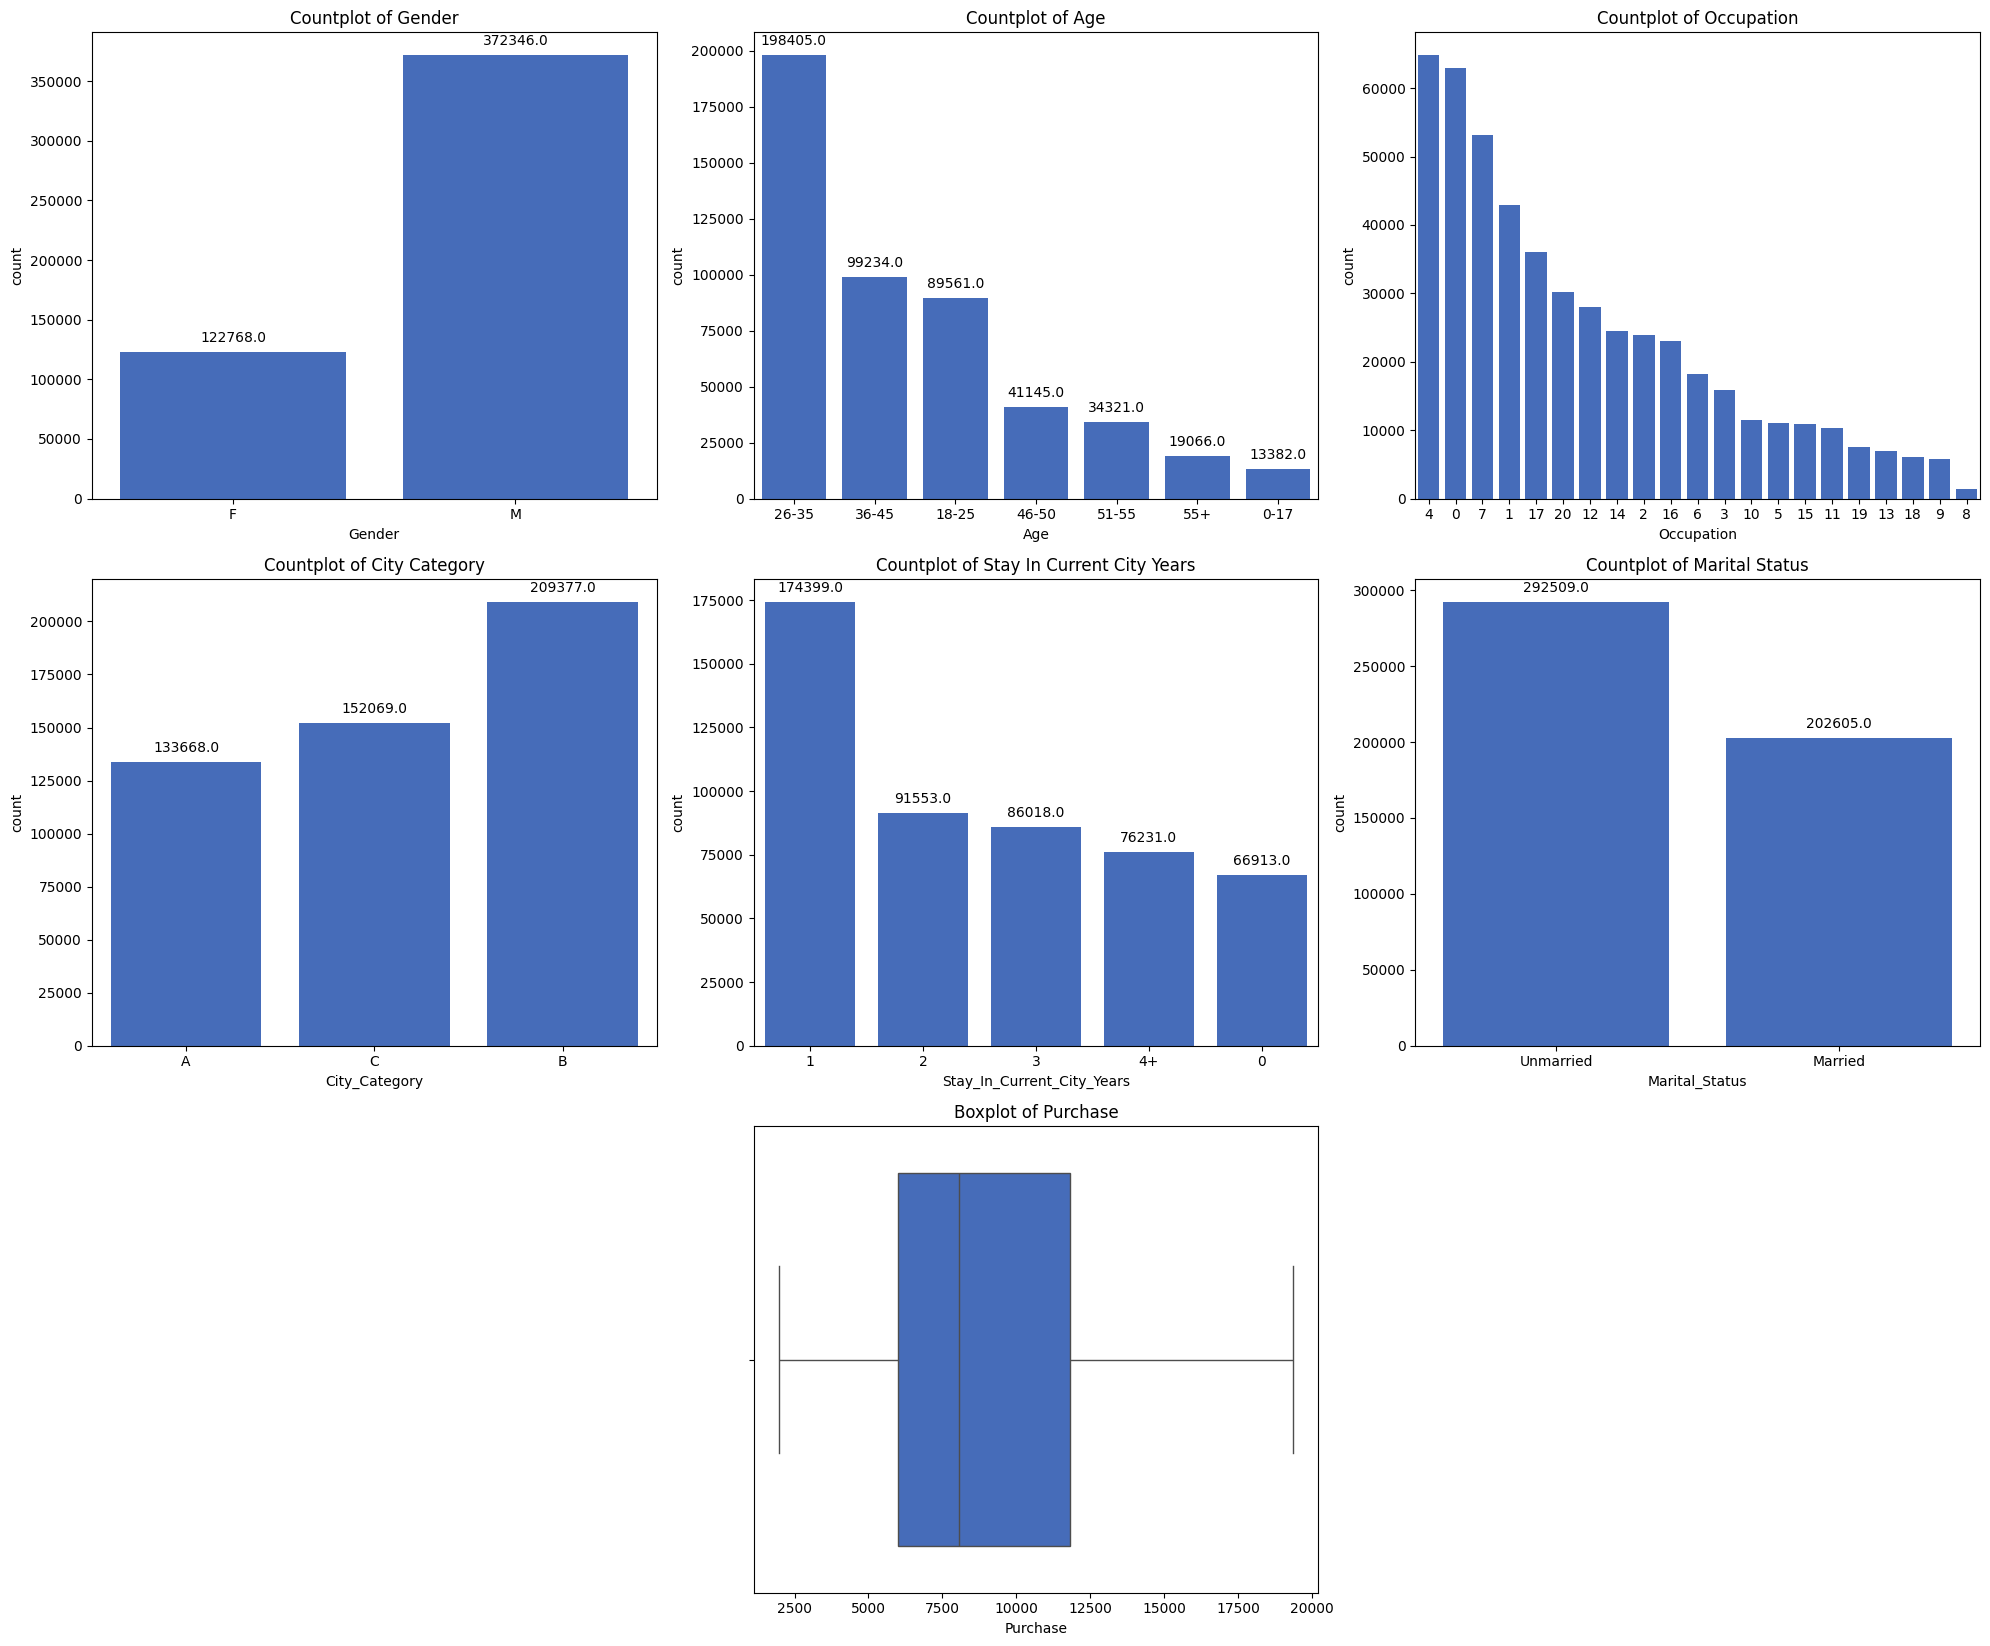

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall title
plt.suptitle('Univariate Analysis', fontsize=16)

# Create the figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 18)) # 3 rows and 3 columns of subplots

# Plot the countplots
sns.countplot(x='Gender', data=wal, ax=axs[0, 0], color=(0.2, 0.4, 0.8))
axs[0, 0].set_title('Countplot of Gender')
for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                      textcoords='offset points')

age_val_counts = wal['Age'].value_counts()
sns.countplot(x=wal['Age'], order=age_val_counts.index, ax=axs[0, 1], color=(0.2, 0.4, 0.8))
axs[0, 1].set_title('Countplot of Age')
for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                      textcoords='offset points')

occu_val_counts = wal['Occupation'].value_counts()
sns.countplot(x='Occupation', data=wal, order=occu_val_counts.index, ax=axs[0, 2], color=(0.2, 0.4, 0.8))
axs[0, 2].set_title('Countplot of Occupation')

sns.countplot(x='City_Category', data=wal, ax=axs[1, 0], color=(0.2, 0.4, 0.8))
axs[1, 0].set_title('Countplot of City Category')
for p in axs[1, 0].patches:
    axs[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                      textcoords='offset points')

stayed_in_city_val = wal['Stay_In_Current_City_Years'].value_counts()
sns.countplot(x='Stay_In_Current_City_Years', data=wal, order=stayed_in_city_val.index, ax=axs[1, 1], color=(0.2, 0.4, 0.8))
axs[1, 1].set_title('Countplot of Stay In Current City Years')
for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                      textcoords='offset points')

Marital_Status_vals = wal['Marital_Status'].value_counts()
sns.countplot(x='Marital_Status', data=wal, order=Marital_Status_vals.index, ax=axs[1, 2], color=(0.2, 0.4, 0.8))
axs[1, 2].set_title('Countplot of Marital Status')
for p in axs[1, 2].patches:
    axs[1, 2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                      textcoords='offset points')

sns.boxplot(x='Purchase', data=wal, ax=axs[2, 1], color=(0.2, 0.4, 0.8))
axs[2, 1].set_title('Boxplot of Purchase')

# Turn off the empty axes
axs[2, 0].axis('off')
axs[2, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the suptitle
plt.show()

**Insights:**

Count of Male are 321072 and Female are 103266

The most people are in the age of 26-35 , 36-45

The most people are in the Occupation Category of 4 , 0

Most people who buy from Walmart are from the City Category of B

Mostly the people who stayed in City and buying from Walmart are 1 year

Count of Unmarried people are 254850 and Married people are 170118

Median of Purchase are nearly at 8000


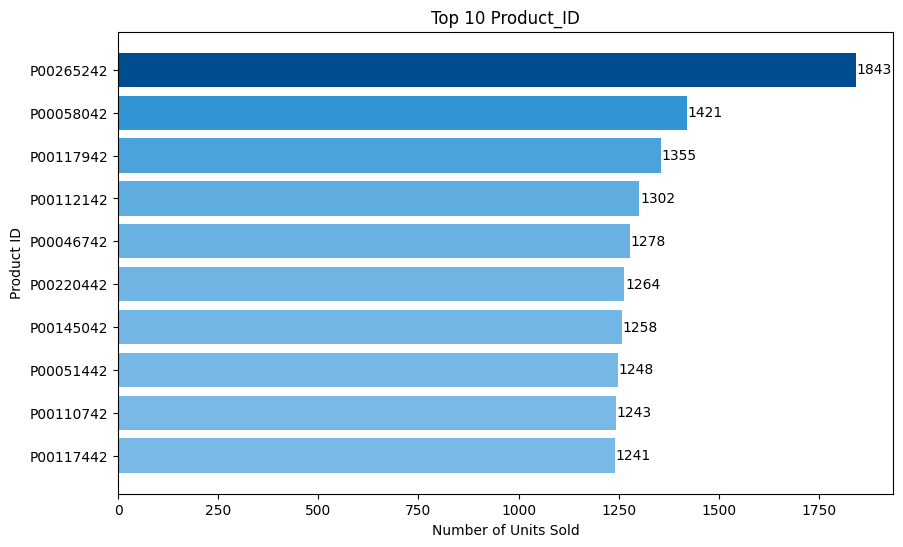

In [ ]:
import matplotlib.colors as mcolors
colors = ['#78b9e7', '#007dc6','#004c91']
wal_top_10_prod_sale=wal['Product_ID'].value_counts().head(10)
# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=100)
# Normalize the values
norm = plt.Normalize(min(wal_top_10_prod_sale), max(wal_top_10_prod_sale))
# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, (index, value) in enumerate(wal_top_10_prod_sale.items()):
 color = cmap(norm(value))
 ax.barh(index, value, color=color)
for y,x in zip(wal_top_10_prod_sale.index,wal_top_10_prod_sale.values):
 ax.text( x +2 , y , x,va='center')
ax.set_xlabel('Number of Units Sold')
ax.set_ylabel('Product ID')
ax.set_title('Top 10 Product_ID')
ax.invert_yaxis() # To display the highest purchase amount at the top
plt.show()

**Insights:**

The Product_ID with P00265242 has got max sales

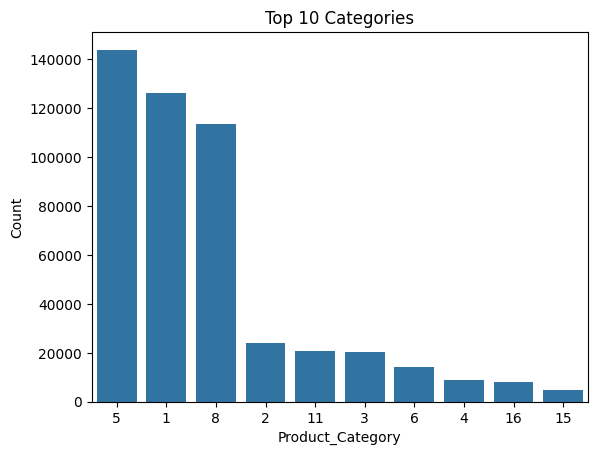

In [ ]:
wal_top_10_prod_category = wal['Product_Category'].value_counts().head(10).sort_values(ascending=False)
# Convert the Series to a DataFrame for plotting
df_top_10_prod_category = wal_top_10_prod_category.reset_index()
df_top_10_prod_category.columns = ['Product_Category', 'Count']
sns.barplot(y='Count', x='Product_Category', data=df_top_10_prod_category, order=wal_top_10_prod_category.index)
plt.title('Top 10 Categories')
plt.show()

**Insights:**

The Product Category 5 has got maximum sales in Walmart.

The Product Category 7 has got least sales among top 10 Categories.

**Bivariate Analysis**

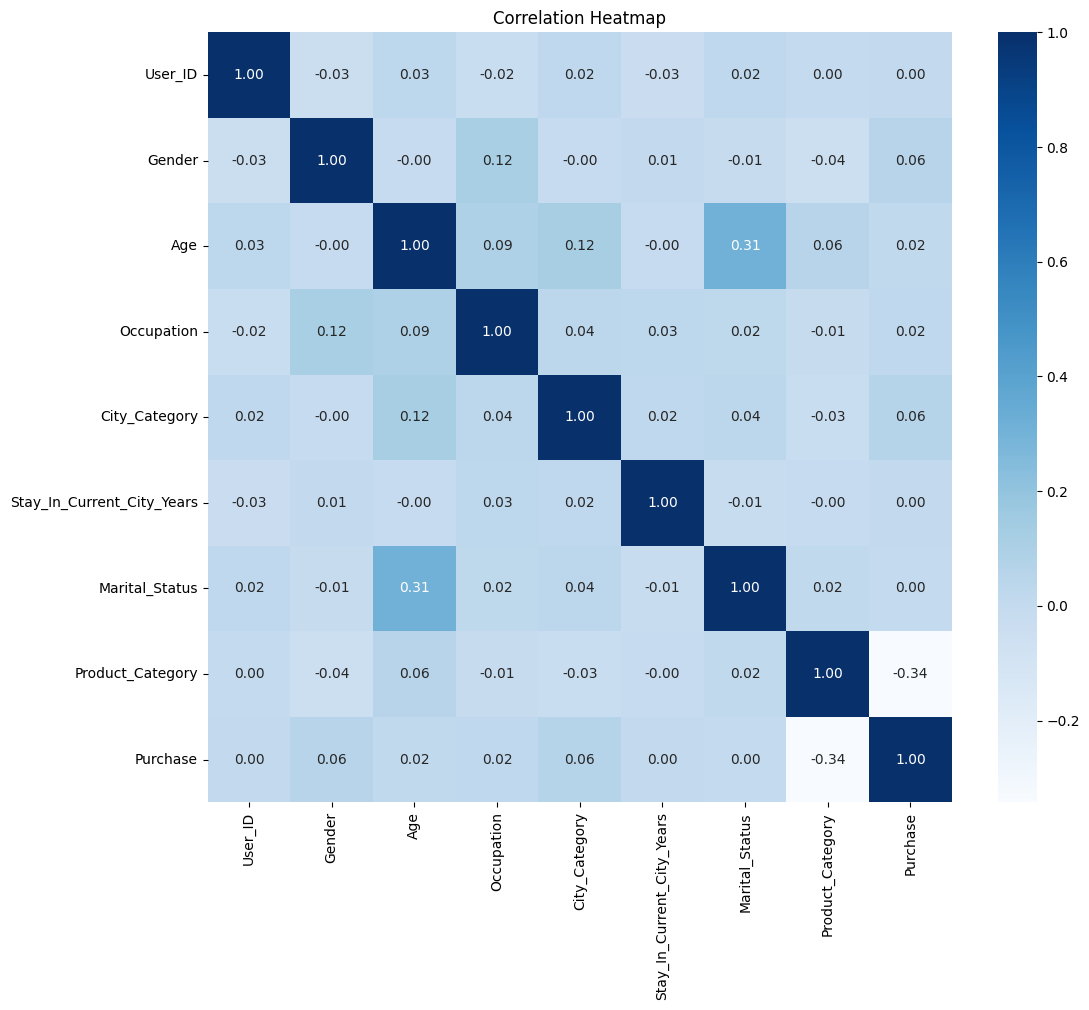

In [ ]:
wal1=wal.copy()
# Assuming the DataFrame is named 'wal1'
# Convert categorical variables to numerical values
# Convert 'Gender' to numerical
wal1['Gender'] = wal1['Gender'].map({'F': 0, 'M': 1})
# Convert 'Age' to numerical categories
age_mapping = {
 '0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6
}
wal1['Age'] = wal1['Age'].map(age_mapping)
# Convert 'City_Category' to numerical
city_mapping = {
 'A': 0,
 'B': 1,
 'C': 2
}
wal1['City_Category'] = wal1['City_Category'].map(city_mapping)
# Convert 'Stay_In_Current_City_Years' to numerical, assuming '4+' as 4
wal1['Stay_In_Current_City_Years'] = wal1['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
# Convert 'Marital_Status' to numerical
wal1['Marital_Status'] = wal1['Marital_Status'].replace({'Unmarried':0,'Married':1})
# 'Product_ID' can be dropped as it is a unique identifier
wal1.drop('Product_ID', axis=1, inplace=True)
# Compute the correlation matrix
corr_matrix = wal1.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**


There is a moderate positive correlation (approximately 0.31) between Age and Marital Status . This suggests that as age increases, there is a higher likelihood of being married, which makes intuitive sense.

There is a noticeable negative correlation (approximately -0.34) between Product_Category and Purchase. This indicates that certain product categories may be associated with lower purchase amounts or that higher product
categories may have lower spending.

The correlation between all the columns vs Purchase are very low , indicating that gender does not have a strong influence.

Overall, most variables show weak correlations with each other, as the coefficients are close to 0.This suggests that there may not be strong linear relationships between most of these variables in the dataset

**Product Category vs Age**

Text(0, 0.5, 'Count')

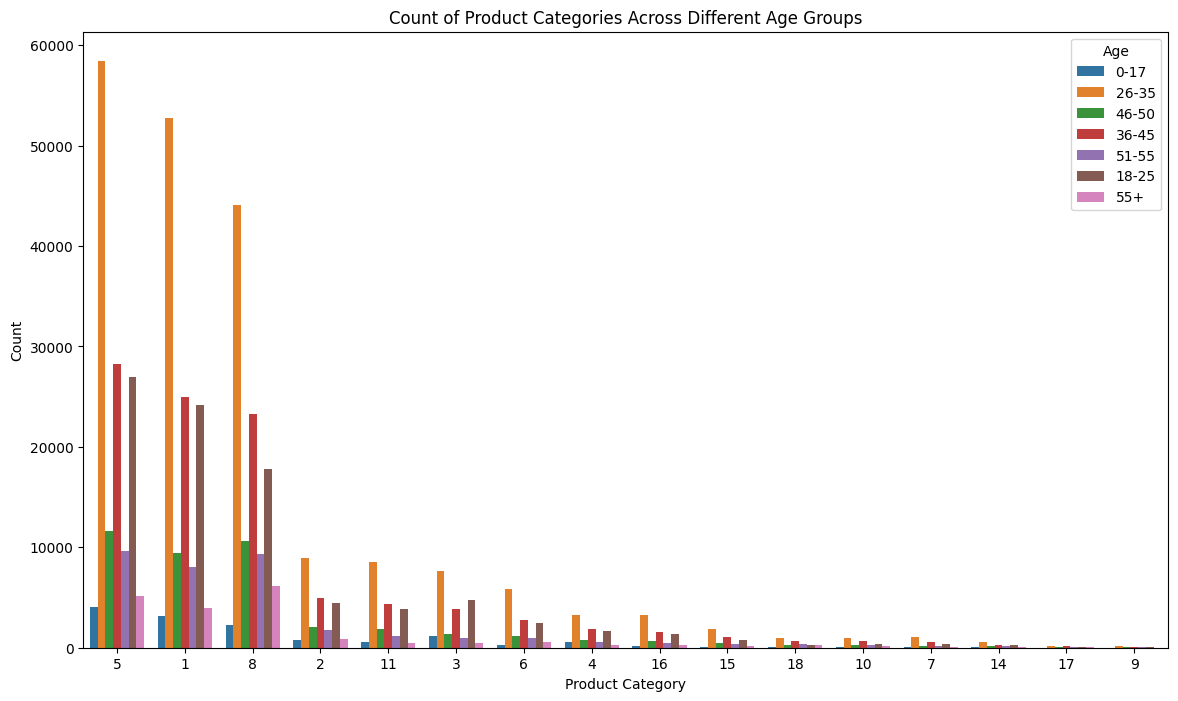

In [ ]:
# Count plot for product categories and age groups
plt.figure(figsize=(14, 8))
sns.countplot(data=wal, x='Product_Category', hue='Age', order=wal['Product_Category'].value_counts().index)
# Set the title and labels
plt.title('Count of Product Categories Across Different Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Count')

**Insights:**

The age group 26-35,36-45,18-25,46-50 has bought the most sales from the Product Category 5.

The age group 55+ has bought the most Products from Category 8


**Purchase Amount vs Marital Status**

<ipython-input-29-dc4edc5f87b4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Marital_Status', y='Purchase', data=wal, ci=None)


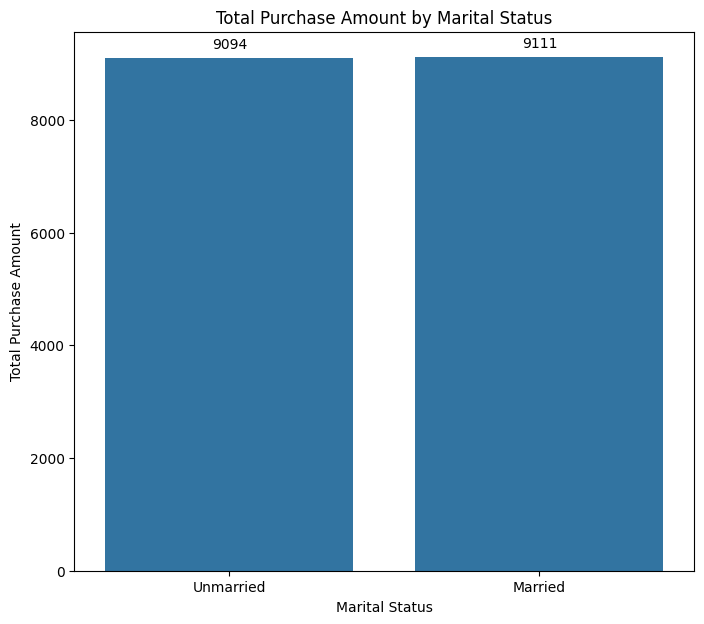

In [ ]:
plt.figure(figsize=(8,7))
ax=sns.barplot(x='Marital_Status', y='Purchase', data=wal, ci=None)
# Annotate the bars with the values
for p in ax.patches:
 ax.annotate(f'{p.get_height():.0f}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', xytext=(0, 10),
 textcoords='offset points')
# Set the title and labels
plt.title('Total Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')
# Show the plot
plt.show()

**Insights:**

The total purchase amount for both Unmarried and Married individuals is very similar, with Unmarried individuals
having a total purchase amount of 9001 and Married individuals having a slightly higher total of 9021 .

This indicates that marital status might not be a significant factor influencing the overall purchase amount in this dataset.

**Age Groups vs Marital Status**

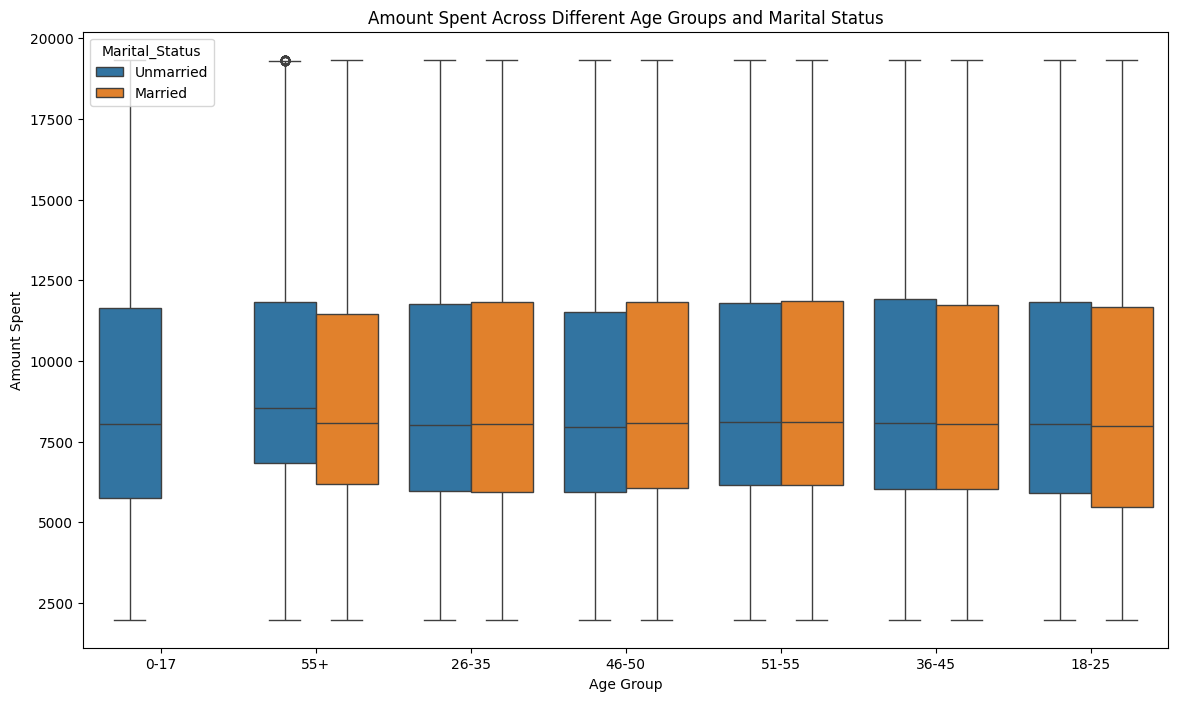

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=wal, x='Age', y='Purchase', hue='Marital_Status')
# Set the title and labels
plt.title('Amount Spent Across Different Age Groups and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Amount Spent')
# Show the plot
plt.show()

**Insights:**

Across most age groups, the median spending is quite similar between unmarried and married individuals.

The age groups 36-45 and 26-35 show higher median spending compared to other age groups. This might indicate that individuals in these age groups are making more significant purchases.

The age group 55+,46-50 has noticeable outliers, particularly among unmarried individuals. These outliers represent a few individuals who spent significantly more than others in the same group.

The age group 46-50 has outliers among married individuals

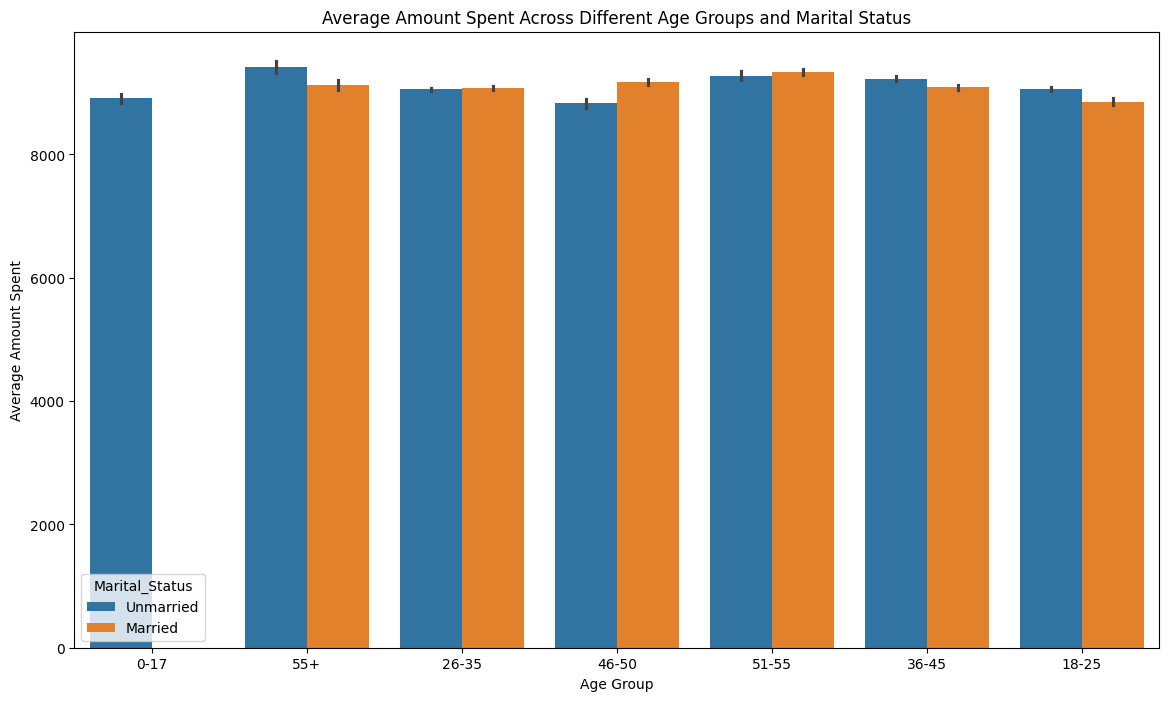

In [ ]:
# Bar plot for average amount spent by age and marital status
plt.figure(figsize=(14, 8))
sns.barplot(data=wal, x='Age', y='Purchase', hue='Marital_Status', estimator=np.mean)
# Set the title and labels
plt.title('Average Amount Spent Across Different Age Groups and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Average Amount Spent')
# Show the plot
plt.show()

**Insights:**

Across all age groups, the average amount spent is very similar between unmarried and married individuals.

The age group 55+ shows the highest average spending by Unmarried individuals.

The age group 46-50 shows the highest average spending by Married individuals.

Consistent spending behavior across marital statuses, age-targeted marketing strategies might be more effective.

Specifically, focusing on individuals in the 55+,46-50 age group could be beneficial for promoting higher-value products
or services.


<ipython-input-32-68979975bb0e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(wal[k].unique())
<ipython-input-32-68979975bb0e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(wal[k].unique())
<ipython-input-32-68979975bb0e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(wal[k].unique())
<ipython-input-32-68979975bb0e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(wal[k].unique())
<ipython-input-32-68979975bb0e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(wal[k].unique())


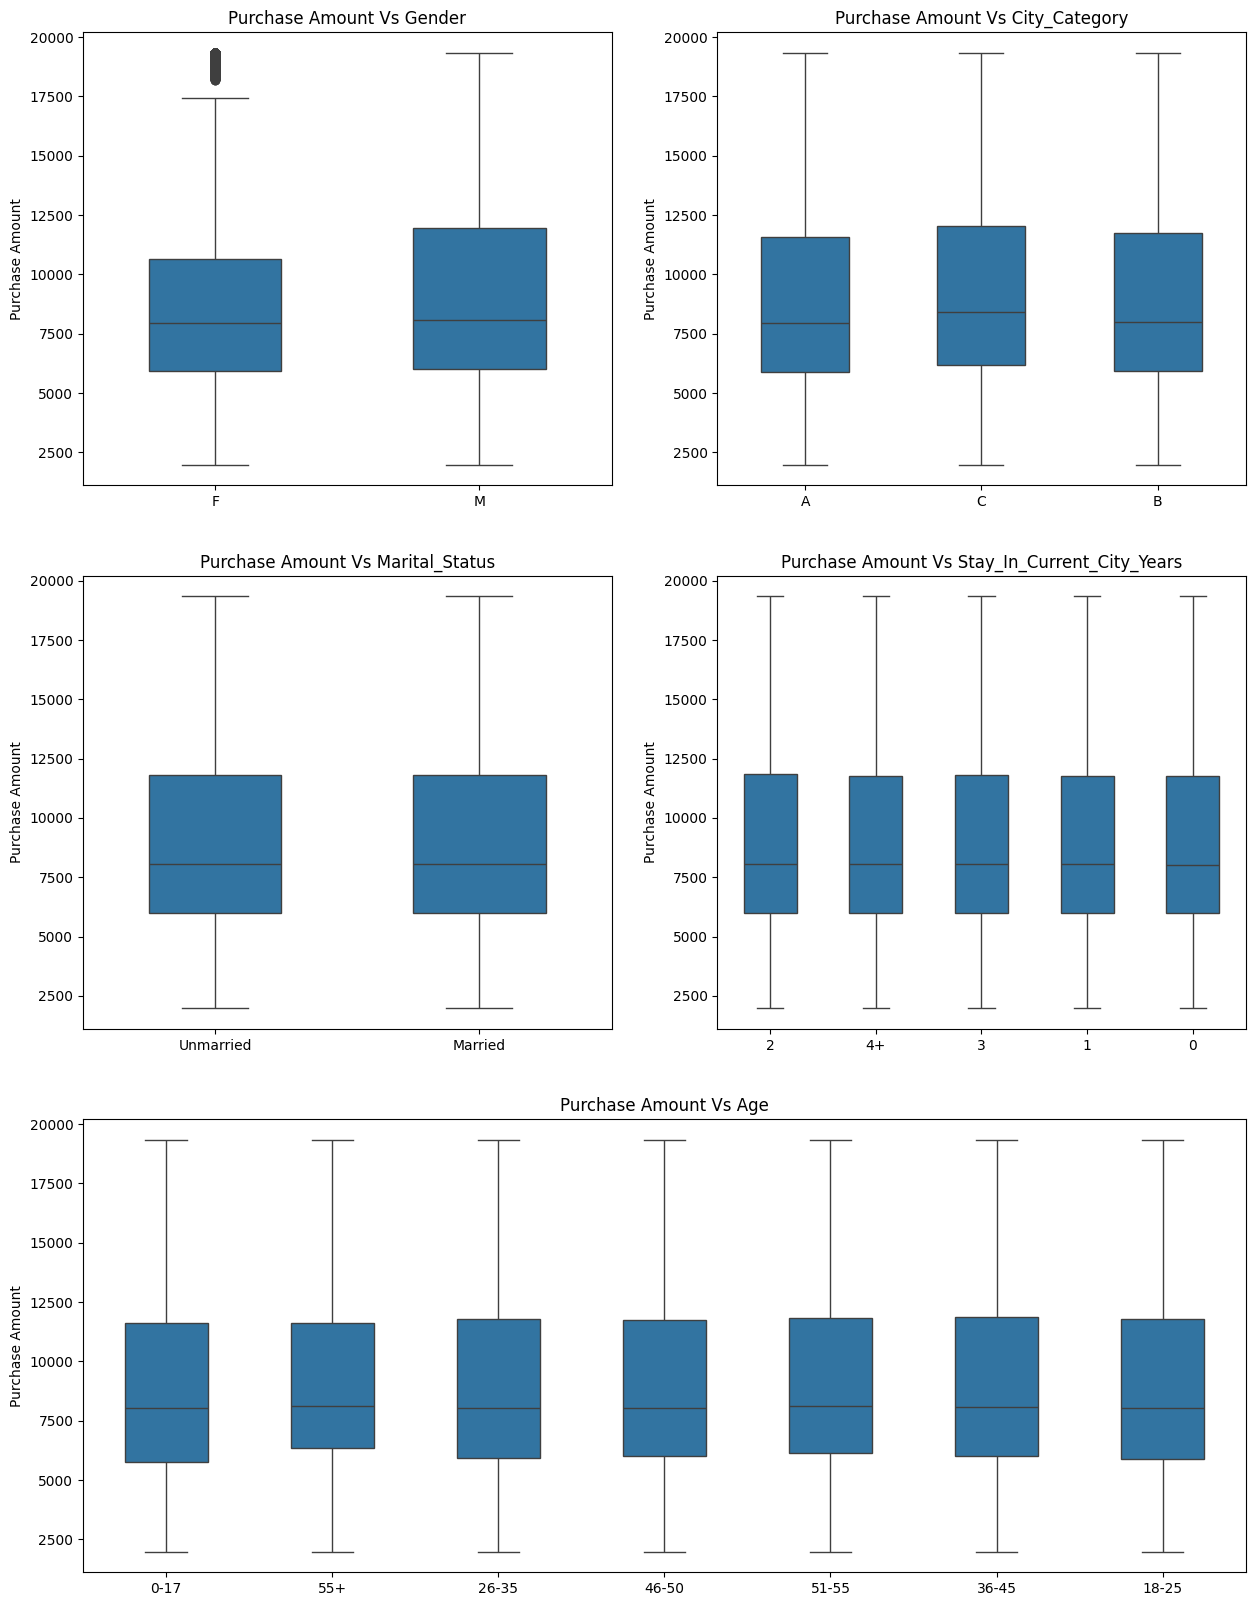

In [ ]:
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)
for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:
#plot position
  if i <= 1:
    ax0 = fig.add_subplot(gs[i,j])
  else:
    ax0 = fig.add_subplot(gs[i,:])

  #plot
  sns.boxplot(data = wal, x = k, y = 'Purchase' ,ax = ax0,width = 0.5)
  ax0.set_title(f'Purchase Amount Vs {k}')

  #customizing axis
  ax0.set_xticklabels(wal[k].unique())
  ax0.set_ylabel('Purchase Amount')
  ax0.set_xlabel('')
plt.show()

**Insights:**



*   **Purchase Amount vs Gender:**

The median purchase amount for males (M) is slightly higher than for females (F).

The distribution for females has more variability, with a few outliers on the higher end.

Males seem to have a wider range of purchase amounts, but fewer outliers compared to females.





*   **Purchase Amount vs City Category:**

The median of City Category C is slightly higher when compared to other City Categories.

All three city categories exhibit a similar range of purchase amounts, with no extreme outliers.






*   **Purchase Amount vs Marital Status:**

The median Purchase Amount between both statuses are almost same.

Both categories have a similar range of purchase amounts, suggesting consistent spending behavior across marital statuses




*   **Purchase Amount vs Stay_In_Current_City_Years:**

The number of years a person has stayed in their current city does not show a clear pattern or significant impact on the purchase amount.

The medians across different categories (0, 1, 2, 3, 4+) are quite similar, and the spread of purchase amounts is consistent.






*  **Purchase Amount vs Age:**

The median purchase amount is consistent across most age groups, except for the 55+ age group, where it appears slightly higher.

All age groups exhibit a similar range of purchase amounts, but there are no significant outliers.



**Purchase Amount vs Gender**

<ipython-input-33-8a2a5cdff97e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Gender', y='Purchase', data=wal, ci=None)


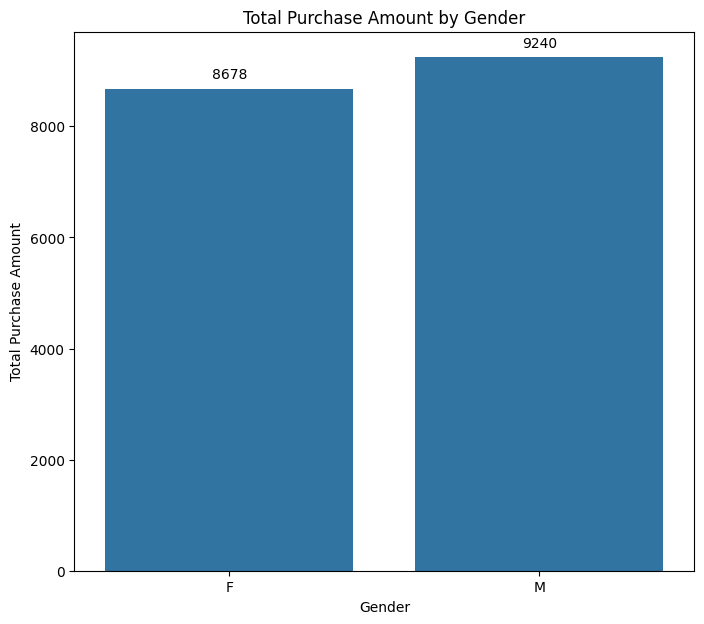

In [ ]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x='Gender', y='Purchase', data=wal, ci=None)
# Annotate the bars with the values
for p in ax.patches:
 ax.annotate(f'{p.get_height():.0f}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', xytext=(0, 10),
 textcoords='offset points')
# Set the title and labels
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
# Show the plot
plt.show()

**Insights:**

Males (M) have a higher average total purchase amount (9240) compared to females (F) (8678).

The difference, while present, is not extremely large, indicating that both genders contribute significantly to the total purchases.

While males appear to spend slightly more overall, both genders are strong contributors to the market. This could indicate that marketing strategies should target both genders, with perhaps a slight emphasis on male customers.

**Purchase Amount vs Age**

<ipython-input-34-995e23e8cc70>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Age', y='Purchase', data=wal, ci=None)


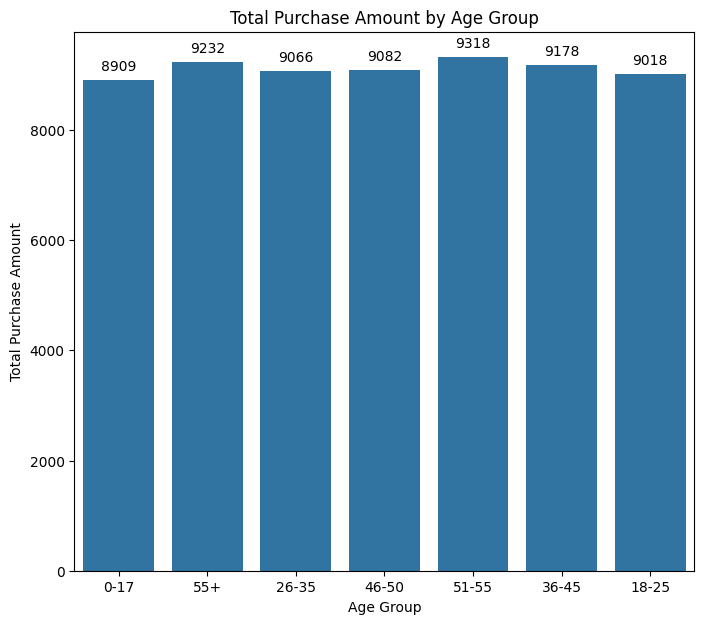

In [ ]:
#customer age vs purchase amount
plt.figure(figsize=(8,7))
ax=sns.barplot(x='Age', y='Purchase', data=wal, ci=None)
# Annotate the bars with the values
for p in ax.patches:
 ax.annotate(f'{p.get_height():.0f}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', xytext=(0, 10),
 textcoords='offset points')
# Set the title and labels
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
# Show the plot
plt.show()

**Insights:**

The total purchase amounts across all age groups are quite close to each other, ranging between approximately 8909 and 9318. This suggests that purchasing behavior does not significantly vary with age.

The 51-55 age group has the highest total purchase amount at 9318 , closely followed by the 55+ age group at 9232.

The 0-17 age group has the lowest total purchase amount at 8909 , which is slightly lower than other groups but still within a close range.

**Product Category vs Gender**

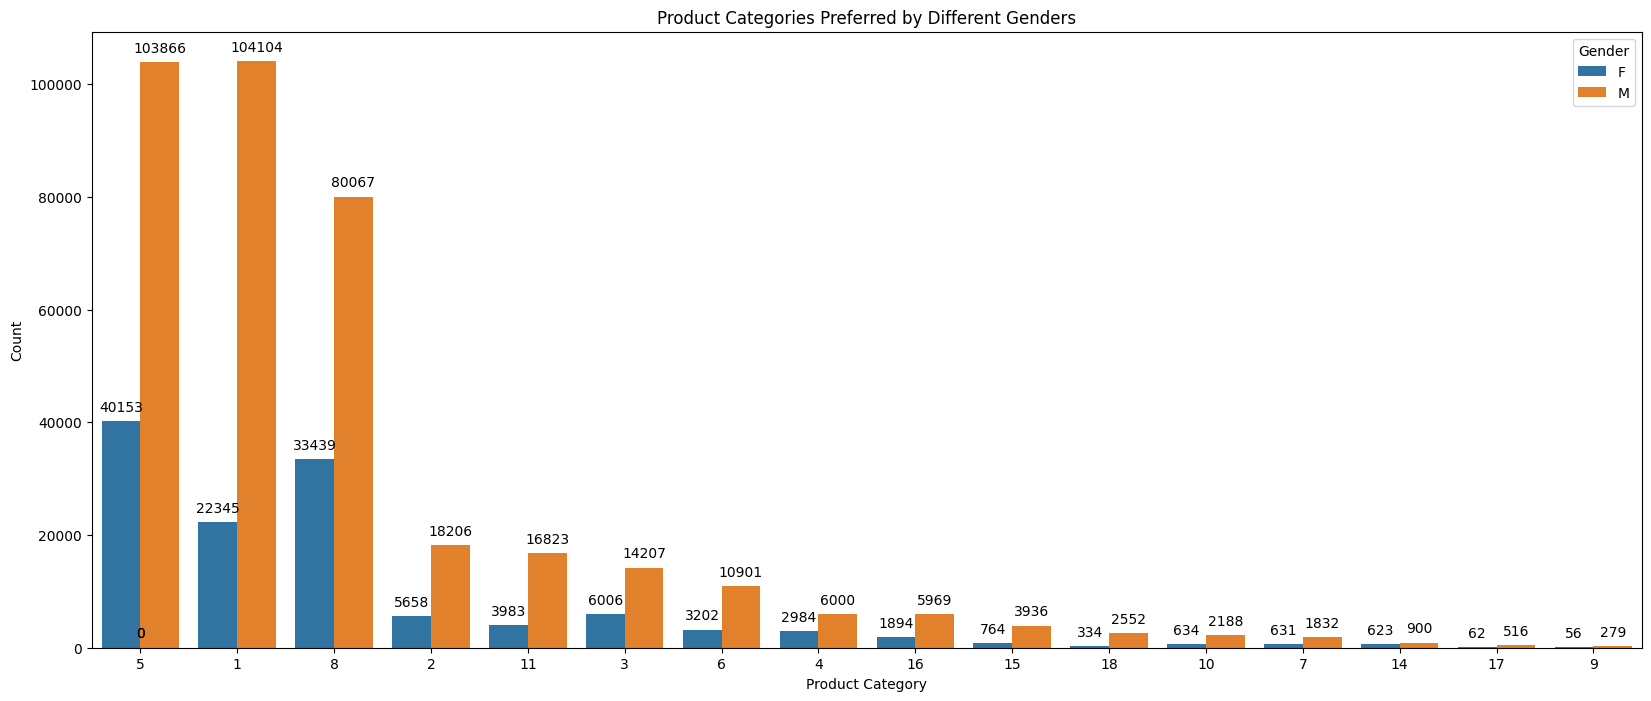

In [ ]:
# Bar plot for product categories by gender
plt.figure(figsize=(20, 8))
ax=sns.countplot(data=wal, x='Product_Category', hue='Gender',order=wal['Product_Category'].value_counts().index)
for p in ax.patches:
  ax.annotate(f'{p.get_height():.0f}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', xytext=(0, 10),
 textcoords='offset points')
# Set the title and labels
plt.title('Product Categories Preferred by Different Genders')
plt.xlabel('Product Category')
plt.ylabel('Count')
# Show the plot
plt.show()

**Insights:**

Males representing the orange bar generally have higher count across most product categories when compared to
Female

Category 5: With a total count of approximately 144,019 (103,866 males and 40,153 females).

Category 1: With a total count of approximately 126,449 (104,104 males and 22,345 females).

Category 8: With a total count of approximately 113,506 (80,067 males and 33,439 females).

Categories like 9, 14, 17, and 7 have the lowest counts across both genders, indicating low overall interest.

Certain categories, like 6, 11, and 16 , show a noticeable difference in gender preferences, where males significantly
outnumber females.

By this we can say Males tend to buy more products when compared to Female on Black Friday


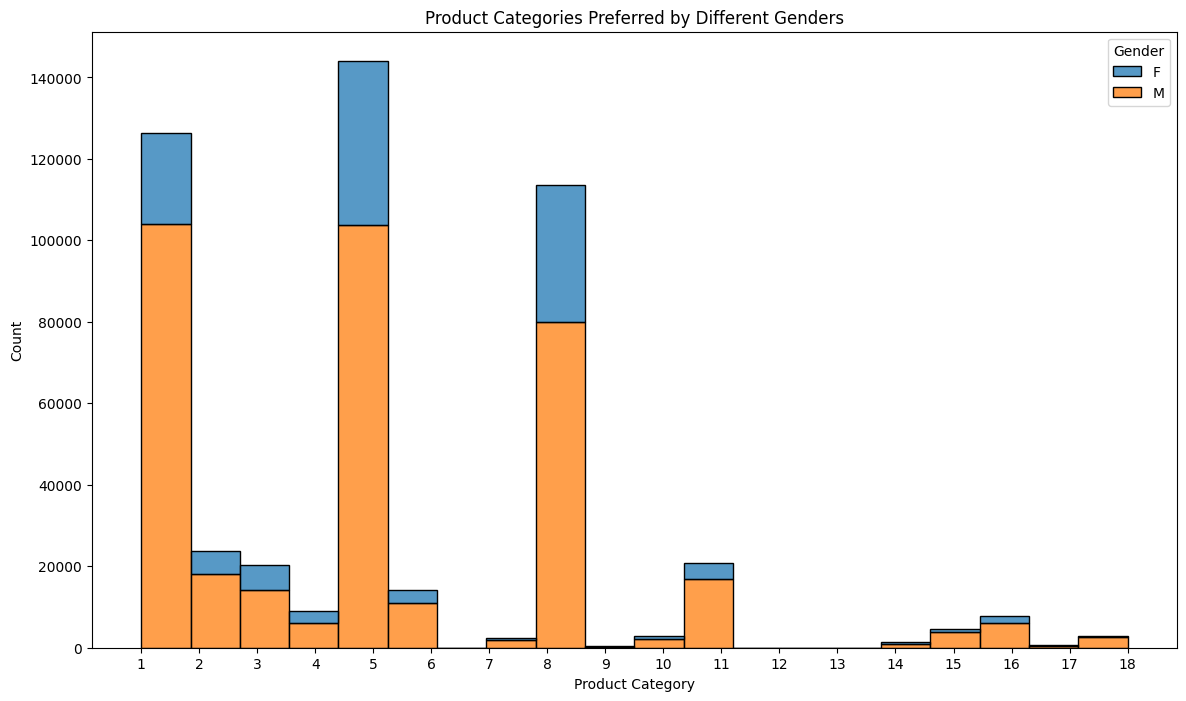

In [ ]:
# Histogram for product categories by gender
plt.figure(figsize=(14, 8))
sns.histplot(data=wal, x='Product_Category', hue='Gender', multiple='stack', bins=20)
# Set the title and labels
plt.title('Product Categories Preferred by Different Genders')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(range(wal['Product_Category'].min(), wal['Product_Category'].max() + 1))
# Show the plot
plt.show()

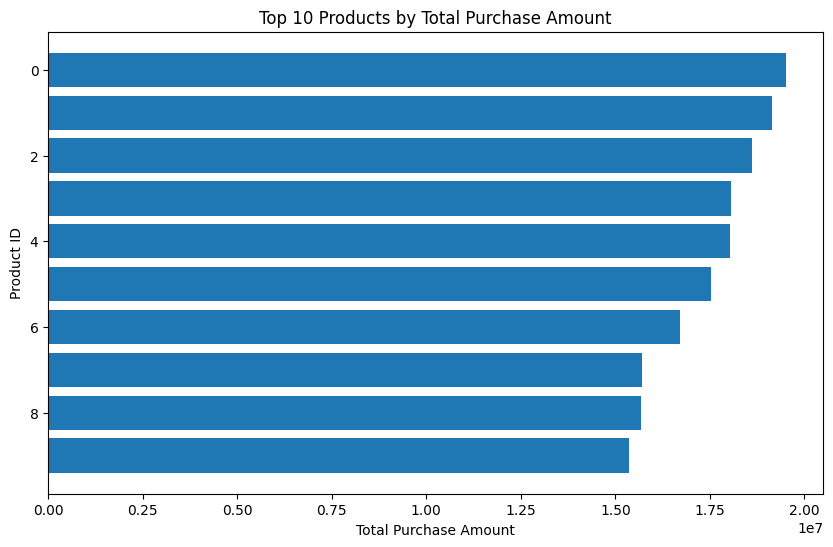

In [ ]:
wal_top10_prod=wal.groupby('Product_ID').agg({'Purchase':'sum'}).sort_values(by='Purchase',ascending=False).head(10)
wal_top10_prod.reset_index(inplace= True)
plt.figure(figsize=(10, 6))
plt.barh(wal_top10_prod.index, wal_top10_prod['Purchase'])
plt.xlabel('Total Purchase Amount')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Total Purchase Amount')
plt.gca().invert_yaxis() # To display the highest purchase amount at the top
plt.show()

**Insights:**

The Product_ID with P00110742 has got sold with highest purchase amount close to 20 million.

The next highest, P00112142 , is slightly lower but still very close to the top product.

The last few products, like P00110942 and P00010742 , have lower total purchase amounts compared to the top

products but are still significant enough to be in the top 10.

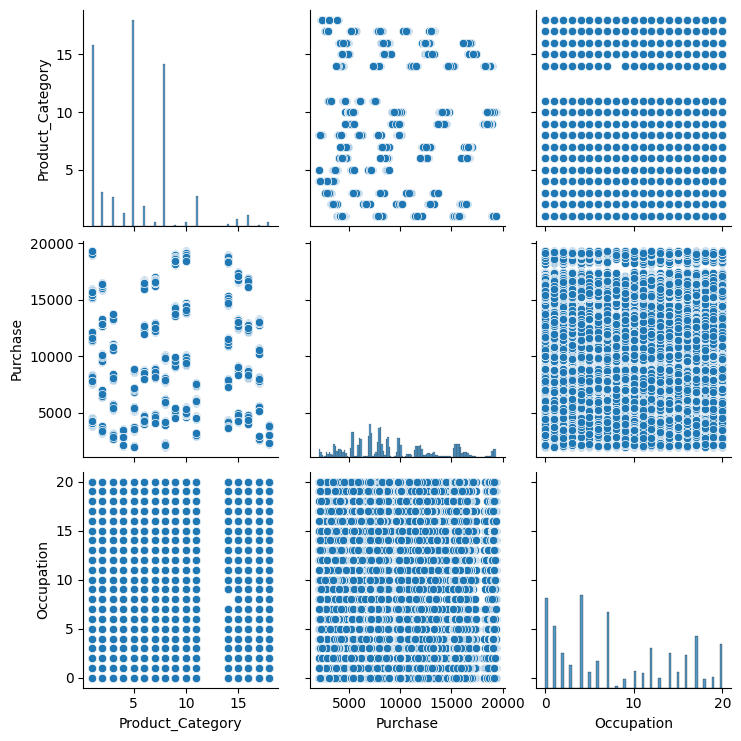

In [ ]:
df=wal[['Product_Category','Purchase','Occupation']]
sns.pairplot(df)

**Insights:**

Product Category vs. Purchase:

The scatter plot in this pair seems to indicate some clustering at certain product categories.

The purchase amounts are scattered across various product categories, with some categories showing higher density at certain purchase levels.

Product Category vs. Occupation:

This plot shows how different product categories are purchased by people in different occupations. It appears that certain product categories are more popular among particular occupations.


Purchase vs. Occupation:

This scatter plot shows the relationship between the amount spent on purchases and the occupation of the buyer.

There seems to be a relatively even spread across occupations for various purchase amounts, but with certain purchase amounts being more common for specific occupations

# **CLT and CI**

In [ ]:
from scipy.stats import norm
male_data = wal[wal['Gender'] == 'M']['Purchase']
female_data = wal[wal['Gender'] == 'F']['Purchase']
# Function to compute confidence interval
def compute_confidence_interval(data, confidence):
  mean = np.mean(data)
  std_err = np.std(data, ddof=1) / np.sqrt(len(data))
  z_score = norm.ppf((1 + confidence) / 2)
  margin_of_error = z_score * std_err
  return mean - margin_of_error, mean + margin_of_error

# Compute confidence interval for entire dataset
ci_male_full = compute_confidence_interval(male_data,0.95)
ci_female_full = compute_confidence_interval(female_data,0.95)

print(f"95% CI for Male (full data): {ci_male_full}")
print(f"95% CI for Female (full data): {ci_female_full}")

# Function for bootstrapping confidence intervals
def bootstrap_confidence_interval(data, num_samples=1000, confidence=0.95):
  bootstrap_means = []
  for _ in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
  upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
  return lower_bound, upper_bound

# Bootstrapping for smaller sample sizes
sample_sizes = [300, 3000, 30000]
ci_male_samples = []
ci_female_samples = []

for size in sample_sizes:
  male_sample = np.random.choice(male_data, size=size, replace=False)
  female_sample = np.random.choice(female_data, size=size, replace=False)
  ci_male_samples.append(bootstrap_confidence_interval(male_sample))
  ci_female_samples.append(bootstrap_confidence_interval(female_sample))
for size, ci_male, ci_female in zip(sample_sizes, ci_male_samples, ci_female_samples):
  print(f"95% CI for Male (sample size {size}): {ci_male}")
  print(f"95% CI for Female (sample size {size}): {ci_female}")

95% CI for Male (full data): (9226.331320504158, 9253.735305698354)
95% CI for Female (full data): (8656.240003190669, 8700.351763393457)
95% CI for Male (sample size 300): (8875.507249999999, 9953.95325)
95% CI for Female (sample size 300): (8266.80825, 9172.328666666666)
95% CI for Male (sample size 3000): (9027.269358333333, 9316.263166666668)
95% CI for Female (sample size 3000): (8593.7271, 8858.737083333333)
95% CI for Male (sample size 30000): (9212.755458333333, 9307.332001666666)
95% CI for Female (sample size 30000): (8637.931183333332, 8725.139783333334)


In [ ]:
#computing confidence interval for 0.90
ci_male_full = compute_confidence_interval(male_data,0.90)
ci_female_full = compute_confidence_interval(female_data,0.90)

print(f"90% CI for Male (full data): {ci_male_full}")
print(f"90% CI for Female (full data): {ci_female_full}")

90% CI for Male (full data): (9228.534238425611, 9251.5323877769)
90% CI for Female (full data): (8659.786005219534, 8696.805761364592)


In [ ]:
#computing confidence interval for 0.99
ci_male_full = compute_confidence_interval(male_data,0.99)
ci_female_full = compute_confidence_interval(female_data,0.99)

print(f"99% CI for Male (full data): {ci_male_full}")
print(f"99% CI for Female (full data): {ci_female_full}")

99% CI for Male (full data): (9222.025842389034, 9258.040783813478)
99% CI for Female (full data): (8649.309543375177, 8707.28222320895)


<ipython-input-42-1cf432d0f355>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_means, label=f'Male (Sample size {size})', shade=True)
<ipython-input-42-1cf432d0f355>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_means, label=f'Female (Sample size {size})', shade=True)


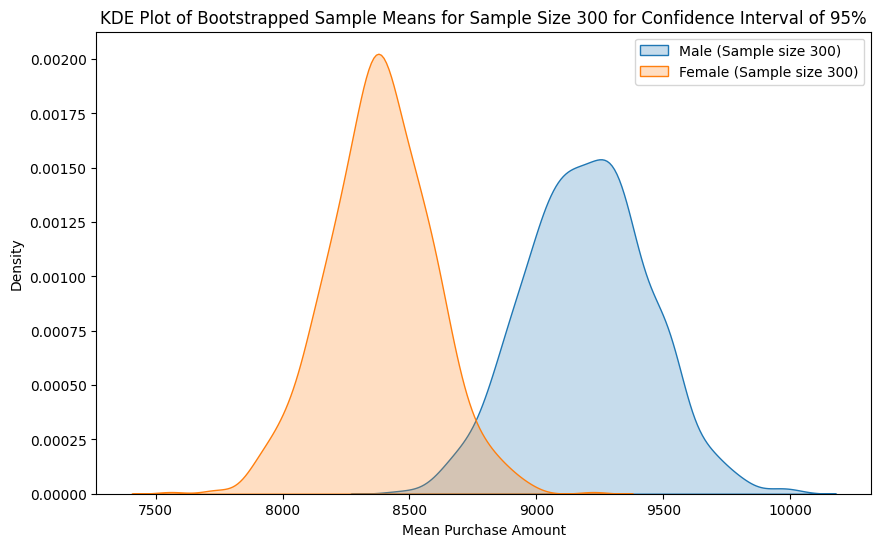

<ipython-input-42-1cf432d0f355>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_means, label=f'Male (Sample size {size})', shade=True)
<ipython-input-42-1cf432d0f355>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_means, label=f'Female (Sample size {size})', shade=True)


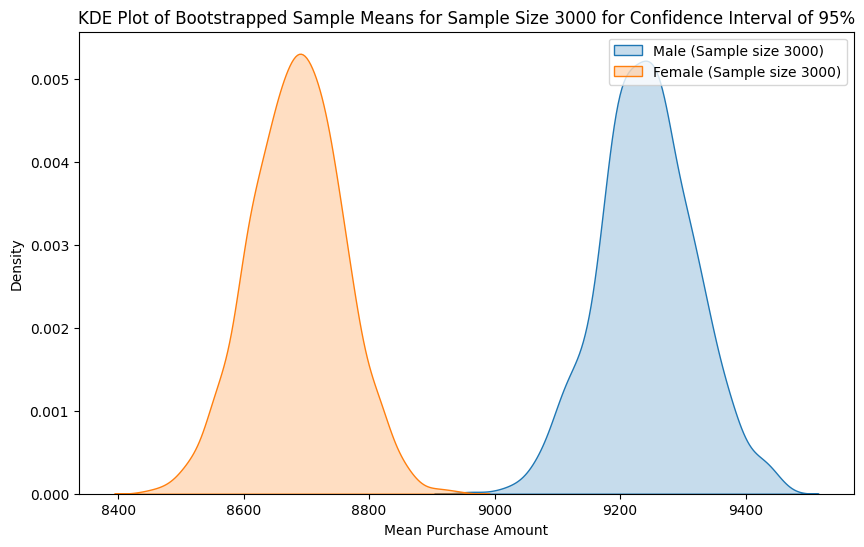

<ipython-input-42-1cf432d0f355>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_means, label=f'Male (Sample size {size})', shade=True)
<ipython-input-42-1cf432d0f355>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_means, label=f'Female (Sample size {size})', shade=True)


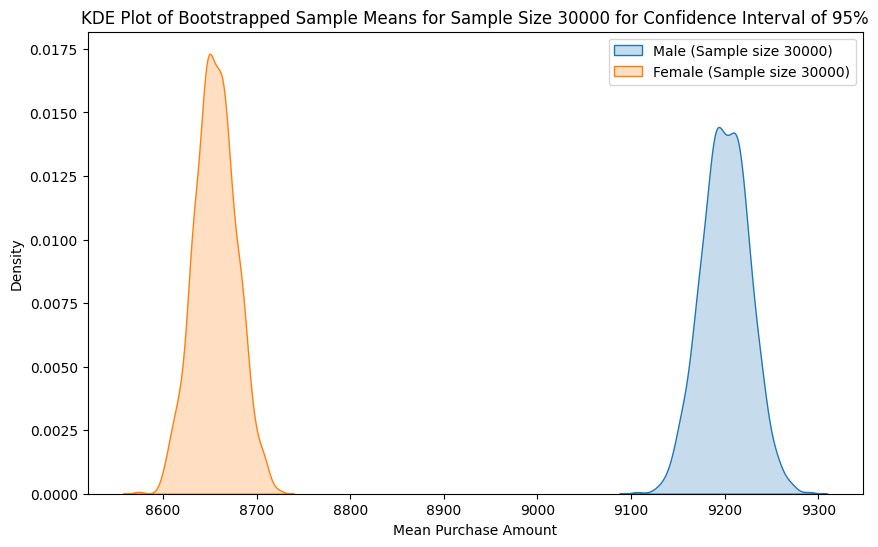

In [ ]:
# Function to plot KDE plots for sample means for confidence interval of 95%
def plot_kde_comparison(male_means, female_means, size):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(male_means, label=f'Male (Sample size {size})', shade=True)
    sns.kdeplot(female_means, label=f'Female (Sample size {size})', shade=True)
    plt.title(f'KDE Plot of Bootstrapped Sample Means for Sample Size {size} for Confidence Interval of 95%')
    plt.xlabel('Mean Purchase Amount')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Bootstrapping function to get sample means
def get_bootstrap_means(data, num_samples=1000):
    bootstrap_means = []
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return bootstrap_means

for size in sample_sizes:
  male_sample = np.random.choice(male_data, size=size, replace=False)
  female_sample = np.random.choice(female_data, size=size, replace=False)

  male_bootstrap_means = get_bootstrap_means(male_sample)
  female_bootstrap_means = get_bootstrap_means(female_sample)

  plot_kde_comparison(male_bootstrap_means, female_bootstrap_means, size)

**i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?**

Yes, the confidence interval (CI) for females using the entire dataset is slightly wider compared to males:

Male (full data): (9226.33, 9253.74) - Width = 27.40

Female (full data): (8656.24, 8700.35) - Width = 44.11

This slight difference could be due to a smaller sample size relative to the male data in the full dataset. More variability or a smaller sample size would lead to a wider CI.


**ii. How is the width of the confidence interval affected by the sample size?**

The width of the confidence interval decreases as the sample size increases:

Sample size 300: The CIs are the widest.

Sample size 3000: The CIs are narrower.

Sample size 30000: The CIs are even narrower and close to the full dataset CIs.

This happens because a larger sample size reduces the standard error of the mean, leading to a more precise estimate of the population mean, and hence a narrower confidence interval

**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, the confidence intervals for different sample sizes do overlap for both genders, although the degree of overlap varies:

Males: The CIs for sample sizes 300, 3000 overlap, and they also overlap with the CI from the full dataset. Females: The CIs also
overlap across different sample sizes, including the full dataset. But they don't overlap for the sample size of 30000. This
overlap suggests that differences in sample size, the mean estimates across different samples are fairly consistent.

**iv. How does the sample size affect the shape of the distributions of the means?**

As the sample size increases:

The distribution of the sample means becomes more narrowly concentrated around the true population mean. The variability
(standard error) decreases, making the distribution of the means sharper and more peaked.

In [ ]:
from scipy.stats import norm
unmarried_data = wal[wal['Marital_Status'] == 'Unmarried']['Purchase']
married_data = wal[wal['Marital_Status'] == 'Married']['Purchase']
# Function to compute confidence interval
def compute_confidence_interval(data, confidence):
  mean = np.mean(data)
  std_err = np.std(data, ddof=1) / np.sqrt(len(data))
  z_score = norm.ppf((1 + confidence) / 2)
  margin_of_error = z_score * std_err
  return mean - margin_of_error, mean + margin_of_error

# Compute confidence interval for entire dataset

ci_unmarried_full = compute_confidence_interval(unmarried_data,0.95)
ci_married_full = compute_confidence_interval(married_data,0.95)

print(f"95% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"95% CI for Married (full data): {ci_married_full}")

# Function for bootstrapping confidence intervals

def bootstrap_confidence_interval(data, num_samples=1000, confidence=0.95):
  bootstrap_means = []
  for _ in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
  upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
  return lower_bound, upper_bound

# Bootstrapping for smaller sample sizes

sample_sizes = [300, 3000, 30000]
ci_unmarried_samples = []
ci_married_samples = []

for size in sample_sizes:
  unmarried_sample = np.random.choice(unmarried_data, size=size, replace=False)
  married_sample = np.random.choice(married_data, size=size, replace=False)
  ci_unmarried = bootstrap_confidence_interval(unmarried_sample)
  ci_married = bootstrap_confidence_interval(married_sample)
  print(f"95% CI for Unmarried (sample size {size}): {ci_unmarried}")
  print(f"95% CI for Married (sample size {size}): {ci_married}")

95% CI for Unmarried (full data): (9078.366027522521, 9108.863028677459)
95% CI for Married (full data): (9092.853027275925, 9129.228175063601)
95% CI for Unmarried (sample size 300): (8238.481083333334, 9142.684)
95% CI for Married (sample size 300): (8170.607916666667, 9229.728749999998)
95% CI for Unmarried (sample size 3000): (8871.782316666666, 9179.431983333334)
95% CI for Married (sample size 3000): (8919.465766666668, 9196.52115)
95% CI for Unmarried (sample size 30000): (9069.5322275, 9165.274714166668)
95% CI for Married (sample size 30000): (9087.6731425, 9183.4879325)


In [ ]:
ci_unmarried_full = compute_confidence_interval(unmarried_data,0.90)
ci_married_full = compute_confidence_interval(married_data,0.90)

print(f"90% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"90% CI for Married (full data): {ci_married_full}")

90% CI for Unmarried (full data): (9080.81758301413, 9106.41147318585)
90% CI for Married (full data): (9095.777108003205, 9126.304094336321)


In [ ]:
ci_unmarried_full = compute_confidence_interval(unmarried_data,0.99)
ci_married_full = compute_confidence_interval(married_data,0.99)

print(f"99% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"99% CI for Married (full data): {ci_married_full}")

99% CI for Unmarried (full data): (9073.574601380702, 9113.654454819278)
99% CI for Married (full data): (9087.138077365376, 9134.94312497415)


<ipython-input-46-ada4b701ea9d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried_means, label=f'Unmarried (Sample size {size})', shade=True)
<ipython-input-46-ada4b701ea9d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married_means, label=f'Married (Sample size {size})', shade=True)


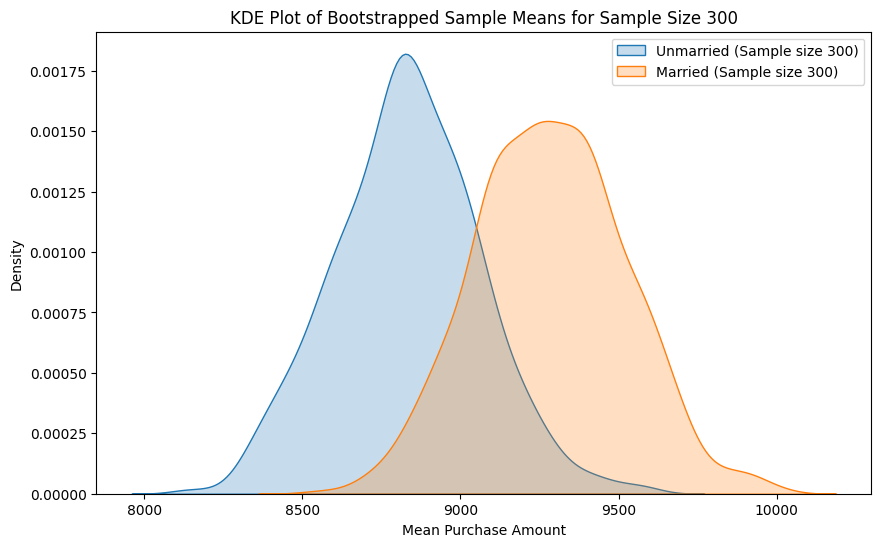

<ipython-input-46-ada4b701ea9d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried_means, label=f'Unmarried (Sample size {size})', shade=True)
<ipython-input-46-ada4b701ea9d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married_means, label=f'Married (Sample size {size})', shade=True)


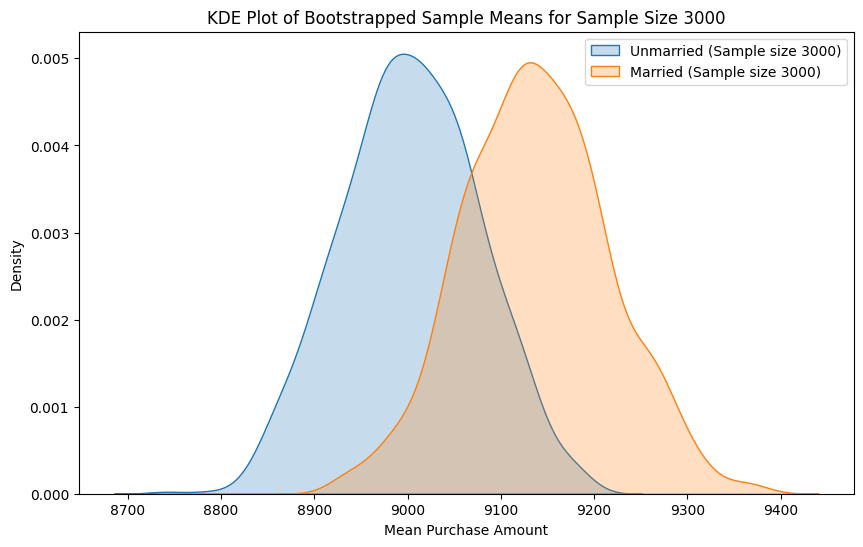

<ipython-input-46-ada4b701ea9d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried_means, label=f'Unmarried (Sample size {size})', shade=True)
<ipython-input-46-ada4b701ea9d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married_means, label=f'Married (Sample size {size})', shade=True)


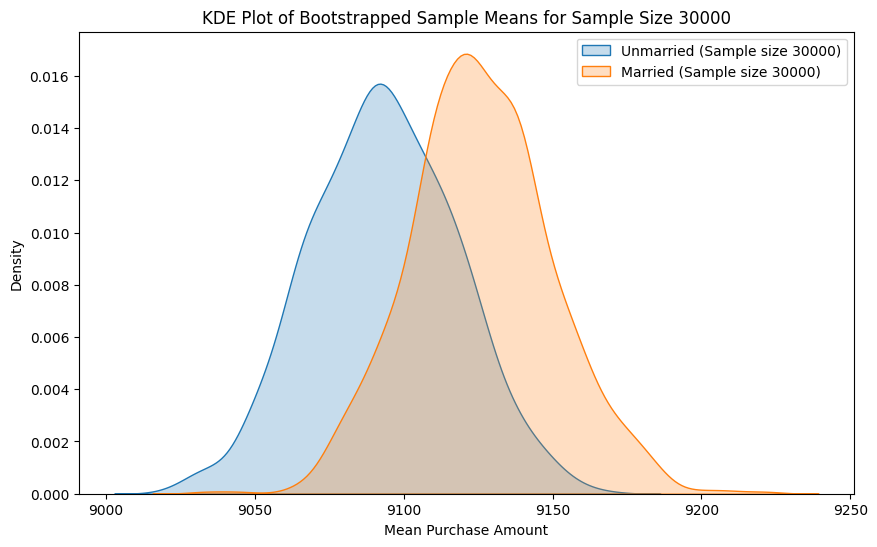

In [ ]:
# Function to plot KDE plots for sample means
def plot_kde_comparison(unmarried_means, married_means, size):
 plt.figure(figsize=(10, 6))
 sns.kdeplot(unmarried_means, label=f'Unmarried (Sample size {size})', shade=True)
 sns.kdeplot(married_means, label=f'Married (Sample size {size})', shade=True)
 plt.title(f'KDE Plot of Bootstrapped Sample Means for Sample Size {size}')
 plt.xlabel('Mean Purchase Amount')
 plt.ylabel('Density')
 plt.legend()
 plt.show()

# Bootstrapping function to get sample means

def get_bootstrap_means(data, num_samples=1000):
  bootstrap_means = []
  for _ in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  return bootstrap_means

# Get and plot KDEs for different sample sizes

for size in sample_sizes:
 unmarried_sample = np.random.choice(unmarried_data, size=size, replace=False)
 married_sample = np.random.choice(married_data, size=size, replace=False)

 unmarried_bootstrap_means = get_bootstrap_means(unmarried_sample)
 married_bootstrap_means = get_bootstrap_means(married_sample)

 plot_kde_comparison(unmarried_bootstrap_means, married_bootstrap_means, size)

**i. Is the confidence interval computed using the entire dataset wider for one of the Marital Status? Why is this the case?**


Yes, the confidence interval (CI) for females using the entire dataset is slightly wider compared to males:

95% CI for Unmarried (full data): (9078.366027522521, 9108.863028677459) 95% CI for Married (full data): (9092.853027275925,9129.228175063601)

Unmarried (full data): (9108.86 - 9078.36) - Width = 28.28

Married (full data): (9129.22 - 9092.85) - Width = 36.37

This slight difference could be due to a smaller sample size relative to the male data in the full dataset. More variability or a smaller sample size would lead to a wider CI.

**ii. How is the width of the confidence interval affected by the sample size**?

The width of the confidence interval decreases as the sample size increases:

Sample size 300: The CIs are the widest.

Sample size 3000: The CIs are narrower.

Sample size 30000: The CIs are even narrower and close to the full dataset CIs.

This happens because a larger sample size reduces the standard error of the mean, leading to a more precise estimate of the population mean, and hence a narrower confidence interval.


**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, the confidence intervals for different sample sizes do overlap for both marital statuses:

Unmarried: The CIs overlap across different sample sizes, indicating consistency in the estimate of the mean across different
samples.

Married: The CIs also overlap across different sample sizes, showing a similar consistency.


**iv. How does the sample size affect the shape of the distributions of the means?**

As the sample size increases:

The distribution of the sample means becomes more narrowly concentrated around the true population mean. The variability (standard error) decreases, making the distribution of the means sharper and more peaked.

In [ ]:
age_groups = {
 '0-17': wal[wal['Age'] == '0-17']['Purchase'],
 '18-25': wal[wal['Age'] == '18-25']['Purchase'],
 '26-35': wal[wal['Age'] == '26-35']['Purchase'],
 '36-45': wal[wal['Age'] == '36-45']['Purchase'],
 '46-50': wal[wal['Age'] == '46-50']['Purchase'],
 '51-55': wal[wal['Age'] == '51-55']['Purchase'],
 '55+': wal[wal['Age'] == '55+']['Purchase']
}

# Function to compute confidence interval

def compute_confidence_interval(data, confidence):
  mean = np.mean(data)
  std_err = np.std(data, ddof=1) / np.sqrt(len(data))
  z_score = norm.ppf((1 + confidence) / 2)
  margin_of_error = z_score * std_err
  return mean - margin_of_error, mean + margin_of_error

  # Compute confidence interval for entire dataset

ci_full_data = {age_group: compute_confidence_interval(data,0.95) for age_group, data in age_groups.items()}

for age_group, ci in ci_full_data.items():
  print(f"95% CI for age group {age_group} (full data): {ci}")

# Function for bootstrapping confidence intervals

def bootstrap_confidence_interval(data, num_samples=1000, confidence=0.95):
  bootstrap_means = []
  for _ in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
  upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
  return lower_bound, upper_bound

# Bootstrapping for smaller sample sizes

sample_sizes = [300, 3000, 30000]
ci_samples = {age_group: [] for age_group in age_groups.keys()}

for size in sample_sizes:
  for age_group, data in age_groups.items():
    if len(data) < size:
      sample = np.random.choice(data, size=size, replace=True) # Use replacement if the sample size exceed
    else:
      sample = np.random.choice(data, size=size, replace=False)
    ci_samples[age_group].append(bootstrap_confidence_interval(sample))
for age_group, ci_list in ci_samples.items():
  for size, ci in zip(sample_sizes, ci_list):
    print(f"95% CI for age group {age_group} (sample size {size}): {ci}")

95% CI for age group 0-17 (full data): (8836.808131792395, 8981.137466772843)
95% CI for age group 18-25 (full data): (8989.942860369223, 9045.34575856089)
95% CI for age group 26-35 (full data): (9047.815575636703, 9084.874880753005)
95% CI for age group 36-45 (full data): (9151.45197256391, 9203.744673746833)
95% CI for age group 46-50 (full data): (9042.426659486213, 9122.03779549009)
95% CI for age group 51-55 (full data): (9274.4547457258, 9362.075308759793)
95% CI for age group 55+ (full data): (9175.10752953456, 9289.040272836153)
95% CI for age group 0-17 (sample size 300): (8189.511166666666, 9128.287333333334)
95% CI for age group 0-17 (sample size 3000): (8565.4953, 8866.312075)
95% CI for age group 0-17 (sample size 30000): (8876.524498333334, 8973.206289166666)
95% CI for age group 18-25 (sample size 300): (8243.775083333334, 9181.783)
95% CI for age group 18-25 (sample size 3000): (8911.020724999998, 9193.418516666667)
95% CI for age group 18-25 (sample size 30000): (8948

In [ ]:
ci_full_data = {age_group: compute_confidence_interval(data,0.90) for age_group, data in age_groups.items()}

for age_group, ci in ci_full_data.items():
  print(f"90% CI for age group {age_group} (full data): {ci}")

90% CI for age group 0-17 (full data): (8848.4103011983, 8969.535297366938)
90% CI for age group 18-25 (full data): (8994.396520538065, 9040.892098392049)
90% CI for age group 26-35 (full data): (9050.794653563466, 9081.895802826242)
90% CI for age group 36-45 (full data): (9155.6556140336, 9199.541032277142)
90% CI for age group 46-50 (full data): (9048.826341758973, 9115.63811321733)
90% CI for age group 51-55 (full data): (9281.498279986516, 9355.031774499077)
90% CI for age group 55+ (full data): (9184.266215042559, 9279.881587328155)


In [ ]:
ci_full_data = {age_group: compute_confidence_interval(data,0.99) for age_group, data in age_groups.items()}
for age_group, ci in ci_full_data.items():
 print(f"99% CI for age group {age_group} (full data): {ci}")

99% CI for age group 0-17 (full data): (8814.132349831298, 9003.81324873394)
99% CI for age group 18-25 (full data): (8981.238434206813, 9054.0501847233)
99% CI for age group 26-35 (full data): (9041.99313681953, 9090.697319570178)
99% CI for age group 36-45 (full data): (9143.23619376647, 9211.960452544272)
99% CI for age group 46-50 (full data): (9029.918843511425, 9134.545611464879)
99% CI for age group 51-55 (full data): (9260.68855756359, 9375.841496922003)
99% CI for age group 55+ (full data): (9157.207398243254, 9306.94040412746)


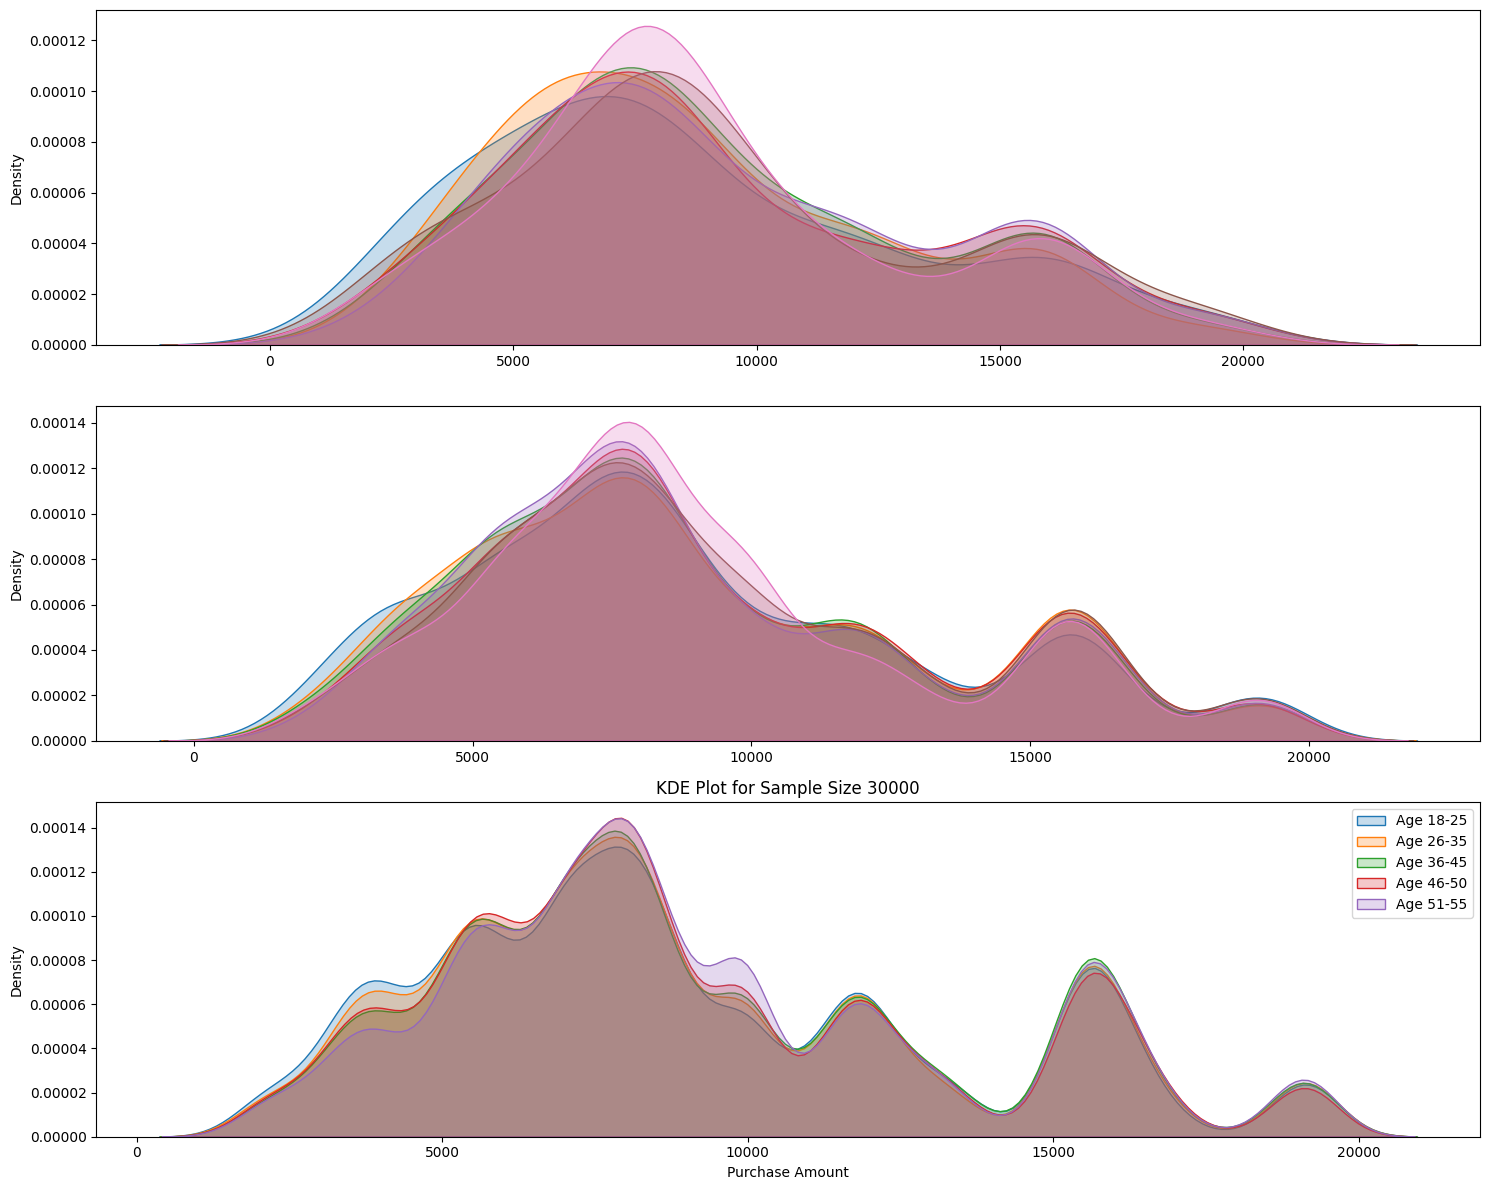

In [ ]:
sample_sizes = [300, 3000, 30000]
# Initialize plot

plt.figure(figsize=(15, 12))

# Plot KDE for each age group and sample size

for i, size in enumerate(sample_sizes, 1):
  plt.subplot(3, 1, i)
  for age_group, data in age_groups.items():
    if len(data) < size:
      sample = np.random.choice(data, size=size, replace=True)
    else:
      sample = np.random.choice(data, size=size, replace=False)
      sns.kdeplot(sample, label=f'Age {age_group}', fill=True)


plt.title(f'KDE Plot for Sample Size {size}')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

**i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?**

Yes, the confidence interval (CI) computed using the entire dataset is wider for some age groups compared to others:

Widest CI: Age group 55+ has a wider CI: (9175.11, 9289.04) - Width = 113.93.

Narrowest CI: Age group 26-35 has a narrower CI: (9047.82, 9084.87) - Width = 37.06.

The wider CI for the 55+ age group might be due to higher variability in their data. Greater variability in the dataset results in more uncertainty about the true mean, leading to a wider confidence interval.


**ii. How is the width of the confidence interval affected by the sample size?**

The width of the confidence interval decreases as the sample size increases:

Sample size 300: The CIs are the widest, indicating more variability in the estimates.

Sample size 3000: The CIs become narrower, indicating more precise estimates.

Sample size 30000: The CIs are even narrower, approaching the precision seen in the full dataset.

This occurs because a larger sample size reduces the standard error, which narrows the confidence interval and leads to more accurate estimates of the population mean.

**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, the confidence intervals for different sample sizes do overlap for all age groups

**iv. How does the sample size affect the shape of the distributions of the means?**

As the sample size increases:

The distribution of the sample means becomes more concentrated around the true population mean. The variability (standard
error) decreases, making the distribution of the sample means narrower and more peaked.

# **Overlap of Confidence Intervals for Average Amount Spent by Males and Female(Full Data)**

95% CI for Males (full data): (9226.33, 9253.74)

95% CI for Females (full data): (8656.24, 8700.35)

These confidence intervals do not overlap. The lower bound of the male confidence interval (9226.33) is higher than the upper
bound of the female confidence interval (8700.35). This indicates that, on average, males spend more than females at Walmart
based on the data.

In the online shopping space, Walmart could use this data to personalize product recommendations. For example, male customers might be shown higher-priced or bundled products, while female customers might see more deals or products with strong value propositions.

Walmart could develop more tailored marketing campaigns for male customers, potentially promoting high-ticket items or premium products, knowing that males on average spend more.

Similarly, marketing campaigns for female customers could focus on products that align with their purchasing behavior, perhaps emphasizing value-oriented deals or products that have historically shown higher engagement among female
shoppers

# **Overlap of Confidence Intervals for Average Amount Spent By Married and Unmarried (Full Data)**

The confidence intervals for the average amount spent by married and unmarried individuals using the entire dataset are as
follows:

95% CI for Unmarried (full data): (9078.37, 9108.86)

95% CI for Married (full data): (9092.85, 9129.23)

Yes, the confidence intervals for the average spending of married and unmarried individuals do overlap. Specifically, the interval for unmarried individuals extends from 9078.37 to 9108.86, and the interval for married individuals extends from 9092.85 to 9129.23. The range between 9092.85 and 9108.86 is where these two intervals overlap.

Even though the spending behavior is similar, Walmart can design marketing campaigns that are tailored to the needs and preferences of married and unmarried individuals. For instance, married individuals might respond better to promotions on family-oriented products.

Walmart can use other variables or data (like shopping habits, frequency of purchase, etc.) to further segment customers within the married and unmarried groups to provide a more personalized shopping experience.


# **Overlap of Confidence Intervals for Average Amount Spent By Age Groups (Full Data)**

Age group 0-17: (8836.81, 8981.14)

Age group 18-25: (8989.94, 9045.35)

Age group 26-35: (9047.82, 9084.87)

Age group 36-45: (9151.45, 9203.74)

Age group 46-50: (9042.43, 9122.04)

Age group 51-55: (9274.45, 9362.08)

Age group 55+: (9175.11, 9289.04)

Age group 0-17 vs. 18-25:

There is no overlap between these intervals (8981.14 < 8989.94).

Age group 18-25 vs. 26-35:

There is no overlap between these intervals (9045.35 < 9047.82).

Age group 26-35 vs. 36-45:

There is no overlap between these intervals (9084.87 < 9151.45).

Age group 36-45 vs. 46-50:

There is an overlap between these intervals (9151.45 overlaps with 9122.04).

Age group 46-50 vs. 51-55:

There is no overlap between these intervals (9122.04 < 9274.45).

Age group 51-55 vs. 55+:

There is an overlap between these intervals (9362.08 overlaps with 9175.11).

Walmart can tailor its marketing campaigns to target specific age groups more effectively. For example, since spending increases from younger to older age groups, Walmart can promote premium products and services to older customers
(age groups 51-55 and 55+) while offering budget-friendly options to younger age groups (0-17 and 18-25).

Stores could be organized with sections designed to appeal to specific age groups, ensuring that high-spending age groups are targeted with premium placement for products they are more likely to purchase.

Walmart could develop personalized promotional strategies for different age groups based on their spending habits. For example, offering loyalty discounts to older customers or back-to-school promotions targeted at parents shopping for
children in the 0-17 age group.




# **Recommendations:**

1. Targeted Marketing Strategies
Gender-Based Promotions: Since males tend to spend slightly more overall and also have higher average total
purchase amounts, Walmart could focus on marketing campaigns tailored specifically for male shoppers. However,
given the significant contribution of females, especially in certain product categories, it is essential to create genderinclusive promotions as well.
Age-Group-Specific Offers: Walmart could consider targeting these groups with tailored promotions, discounts, or
loyalty programs. Additionally, since the age group 55+ has a high average spending. Walmart could target this
demographic with premium product offerings or personalized promotions.
2. Product Category Optimization
Focus on High-Selling Categories: Product Category 5 has the highest sales, especially among age groups 26-35, 36-
45, 18-25, and 46-50. Walmart should ensure a steady stock of items in this category and consider cross-promotions
with other popular categories to increase sales further.
Address Low-Performing Categories: Categories like 7, 14, 17, and 9 have lower sales. Walmart should either
consider phasing out low-performing products or finding ways to boost their appeal through bundling, discounts, or
marketing efforts targeted at the customers most likely to buy these products.
3. Inventory Management
City Category-Based Stocking: City Category B shows the highest percentage of sales (42.4%). Walmart could ensure
that stores in cities classified as Category B are well-stocked, especially with popular items and categories.
Additionally, more resources could be allocated to understanding the specific needs of shoppers in these cities to
better tailor inventory.
4. Strengthen Loyalty Programs
Enhance Loyalty Programs for Consistent Shoppers: Given the consistent spending patterns across age groups and
marital statuses, Walmart could strengthen its loyalty programs by offering rewards that cater to the specific
preferences of high-spending age groups or those who frequently purchase from certain product categories.
Targeted Rewards for Long-Time Residents: The analysis indicates that people who have stayed in a city for one
year have a high percentage of purchases. Walmart could offer special rewards or incentives for customers based on
the duration of their stay in a particular city to build brand loyalty.
Develop New Products for High-Performing Categories: Walmart could use the insights gained from highperforming product categories to develop new products that align with consumer preferences, especially for those categories where sales are highest